In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import  mean_squared_error
import statsmodels.tools.eval_measures as em
from sklearn import metrics

In [2]:
rcParams['figure.figsize'] = 15,8

In [3]:
Rose = pd.read_csv('Rose.csv')
Sparkling = pd.read_csv('Sparkling.csv')

In [4]:
Rose.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [5]:
Rose.shape

(187, 2)

In [6]:
Rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [7]:
Sparkling.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [8]:
Sparkling.shape

(187, 2)

In [9]:
Sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [10]:
Time_Stamp_R = pd.date_range(start='1980-01-01',periods=len(Rose),freq='M')
Time_Stamp_S = pd.date_range(start='1980-01-01',periods=len(Sparkling),freq='M')

In [11]:
Rose['Time_Stamp'] = Time_Stamp_R
Sparkling['Time_Stamp'] = Time_Stamp_S

In [12]:
Rose.set_index(keys='Time_Stamp',inplace=True)
Sparkling.set_index(keys='Time_Stamp',inplace=True)

In [13]:
Rose.drop(['YearMonth'], axis = 1, inplace = True)
Sparkling.drop(['YearMonth'], axis = 1, inplace = True)

In [14]:
Rose.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [15]:
Sparkling.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

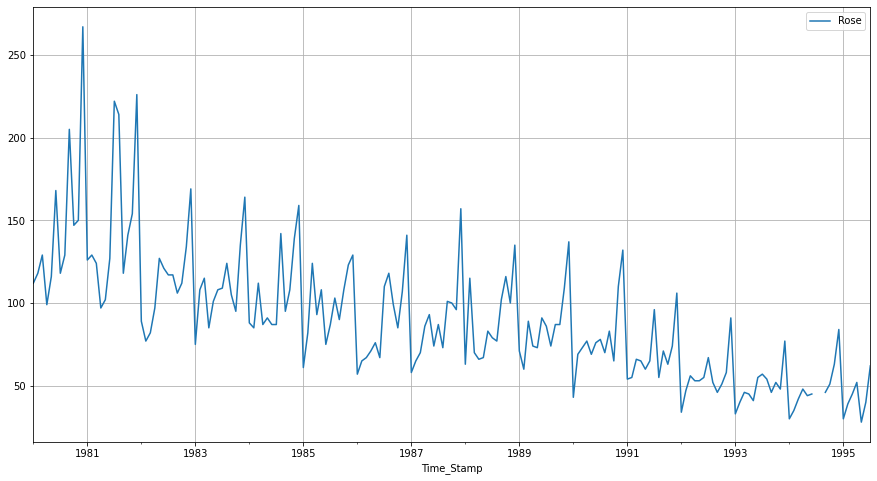

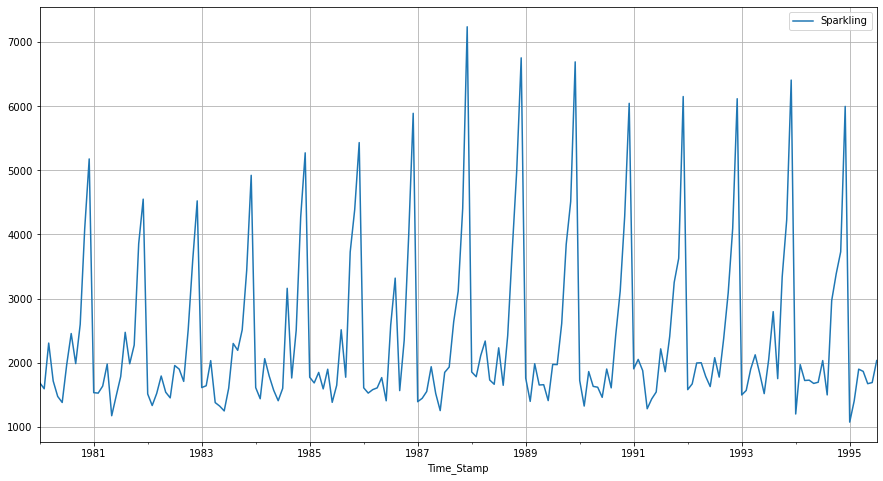

In [16]:
Rose.plot()
plt.grid()
Sparkling.plot()
plt.grid()

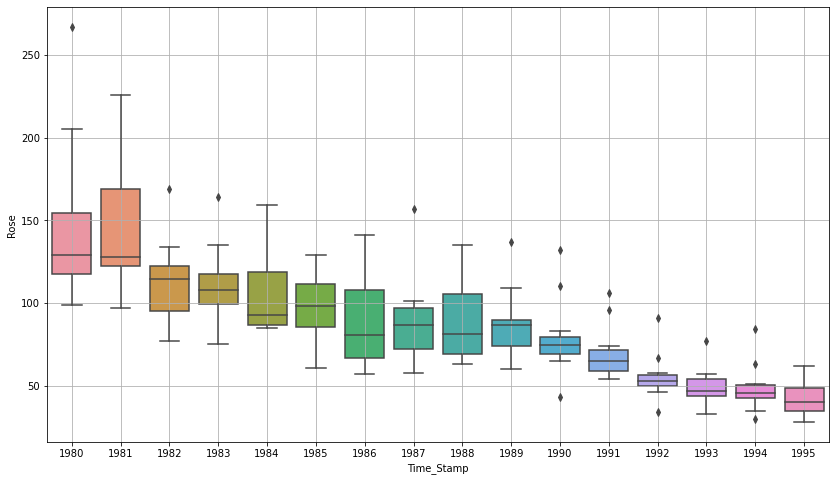

In [17]:
plt.figure(figsize=(14,8))
sns.boxplot(x = Rose.index.year,y = Rose['Rose'])
plt.grid(); 

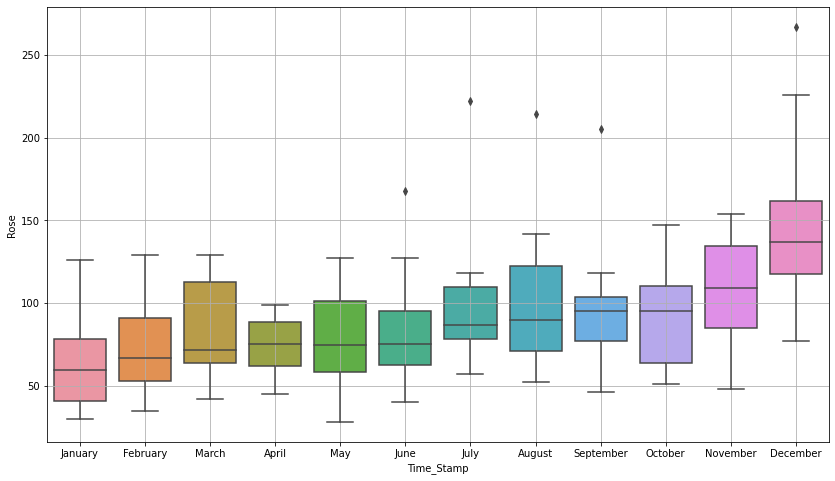

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(x = Rose.index.month_name(),y = Rose['Rose'])
plt.grid(); 

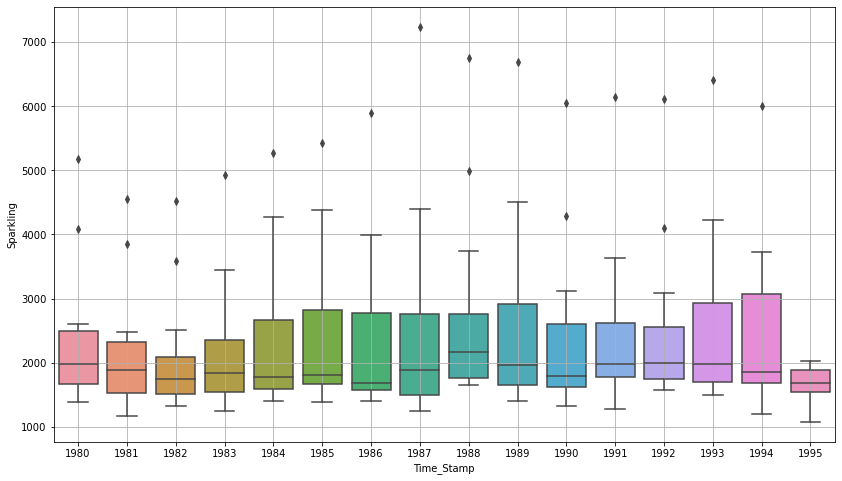

In [19]:
plt.figure(figsize=(14,8))
sns.boxplot(x = Sparkling.index.year,y = Sparkling['Sparkling'])
plt.grid(); 

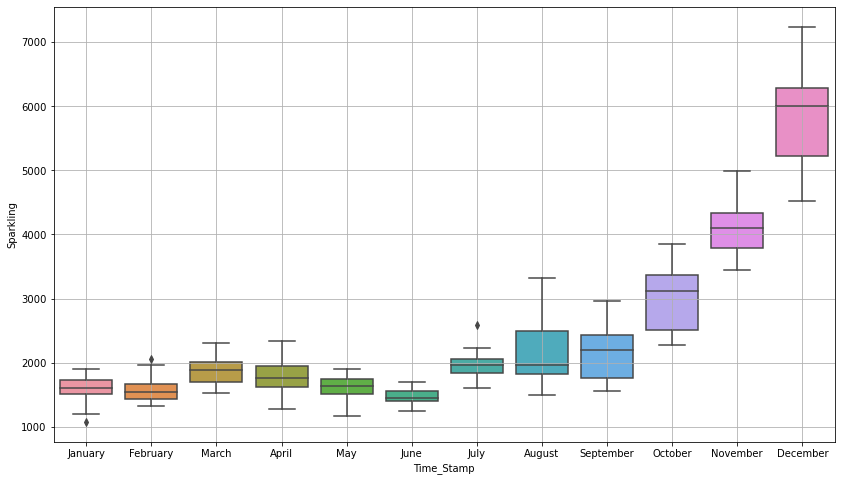

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(x = Sparkling.index.month_name(),y = Sparkling['Sparkling'])
plt.grid(); 

D:\Programs\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
D:\Programs\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


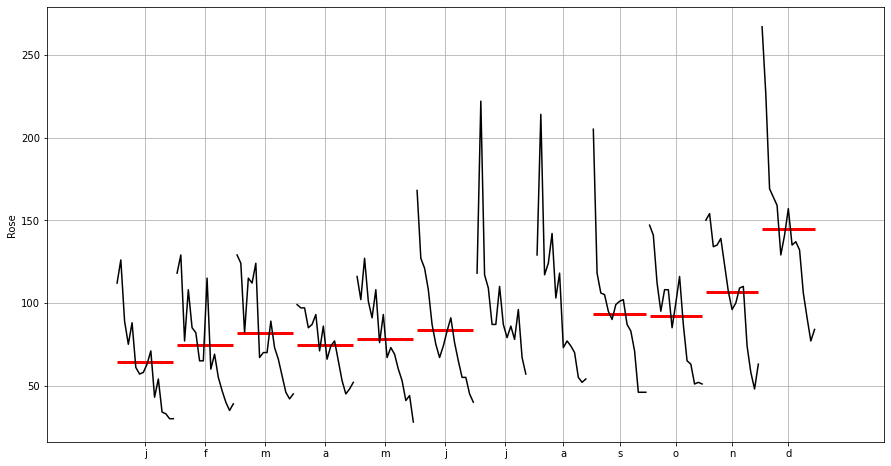

In [21]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(Rose['Rose'],ylabel='Rose')
plt.grid();

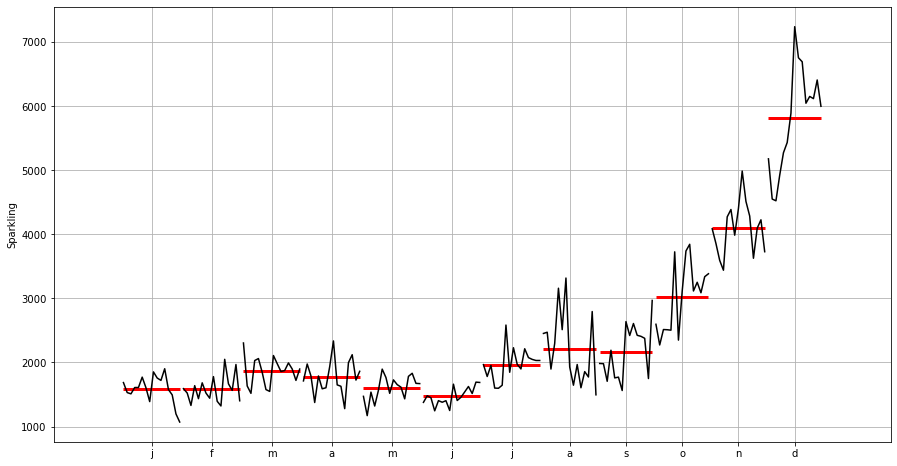

In [22]:
month_plot(Sparkling['Sparkling'],ylabel='Sparkling')
plt.grid();

In [23]:
monthly_sales_across_years_R = pd.pivot_table(Rose, values = 'Rose', columns = Rose.index.month, index = Rose.index.year)
monthly_sales_across_years_R

Time_Stamp     1      2      3     4      5      6      7      8      9   \
Time_Stamp                                                                 
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994         30.0   35.0   42.0  48.0   44.0   45.0    NaN    NaN   46.0   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1980        147.0  150.0  267.0  
1981        141.0  154.0  226.0  
1982        112.0  134.0  169.0  
1983         95.0  135.0  164.0  
1984        108.0  139.0  159.0  
1985        108.0  123.0  129.0  
1986         85.0  107.0  141.0  
1987        100.0   96.0  157.0  
1988        116.0  100.0  135.0  
1989         87.0  109.0  137.0  
1990         65.0  110.0  132.0  
1991         63.0   74.0  106.0  
1992         51.0   58.0   91.0  
1993         52.0   48.0   77.0  
1994         51.0   63.0   84.0  
1995          NaN    NaN    NaN

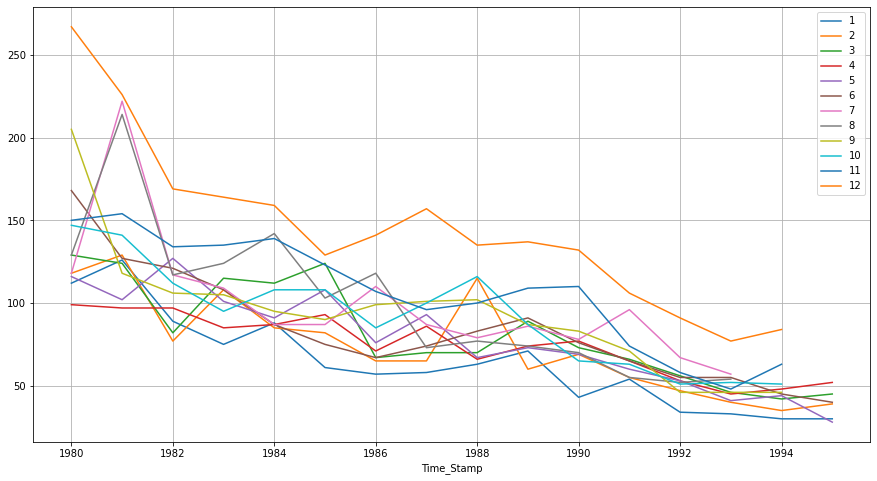

In [24]:
monthly_sales_across_years_R.plot()
plt.grid()
plt.legend(loc='best');

In [25]:
monthly_sales_across_years_S = pd.pivot_table(Sparkling, values = 'Sparkling', columns = Sparkling.index.month, index = Sparkling.index.year)
monthly_sales_across_years_S

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

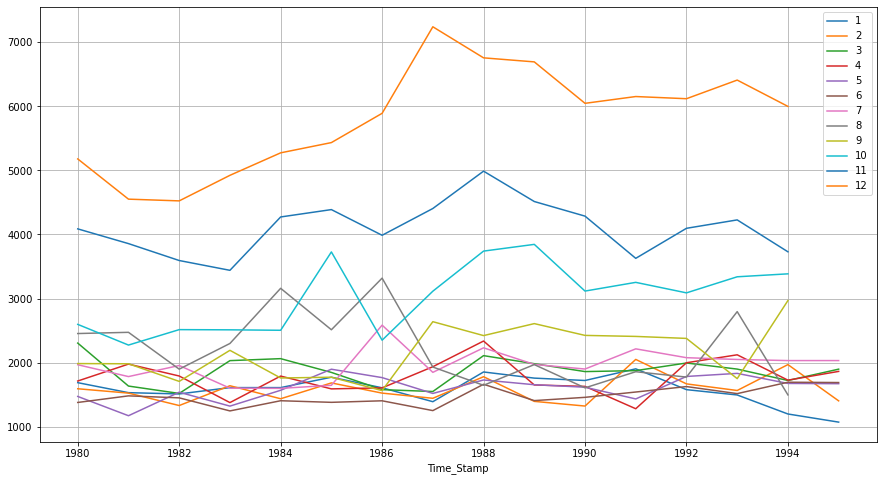

In [26]:
monthly_sales_across_years_S.plot()
plt.grid()
plt.legend(loc='best');

In [27]:
Rose.isna().sum()

Rose    2
dtype: int64

In [28]:
Rose.tail(20)

Rose
Time_Stamp      
1993-12-31  77.0
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  45.0
1994-07-31   NaN
1994-08-31   NaN
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0
1995-01-31  30.0
1995-02-28  39.0
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [29]:
Rose.query('Rose != Rose')

Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN

In [30]:
Rose = Rose.interpolate();

In [31]:
Rose.query('Rose != Rose')

Empty DataFrame
Columns: [Rose]
Index: []

In [32]:
Sparkling.isna().sum()

Sparkling    0
dtype: int64

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

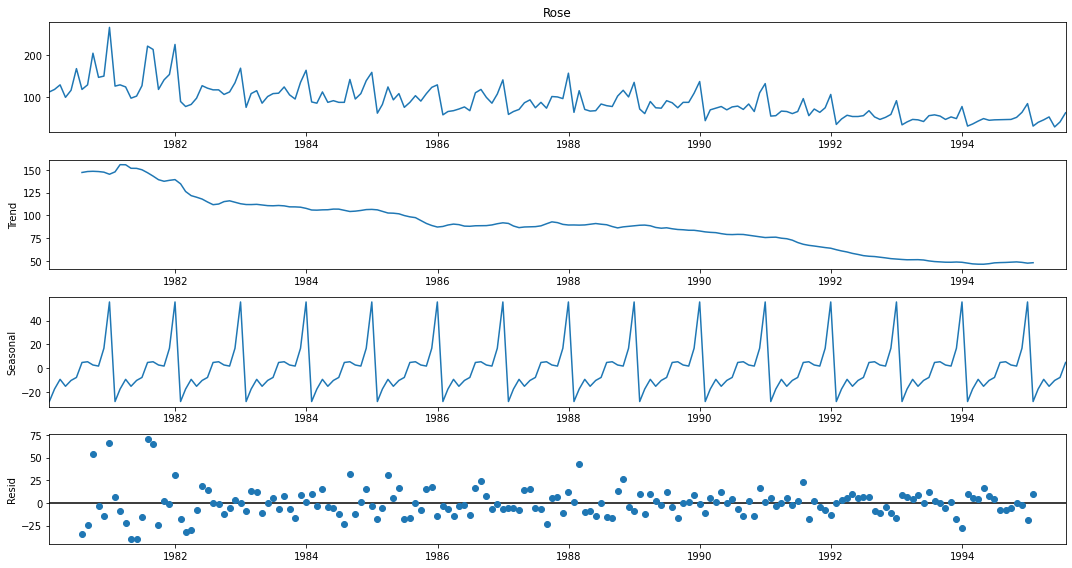

In [34]:
decomposition = seasonal_decompose(Rose['Rose'],model='additive')
decomposition.plot();

In [35]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

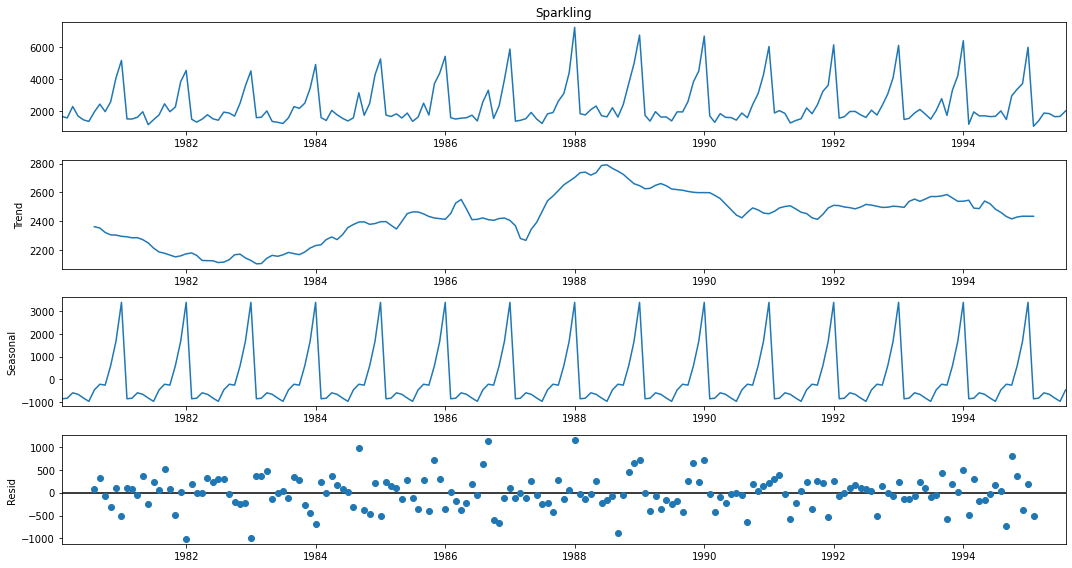

In [36]:
decomposition = seasonal_decompose(Sparkling['Sparkling'],model='additive')
decomposition.plot();

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

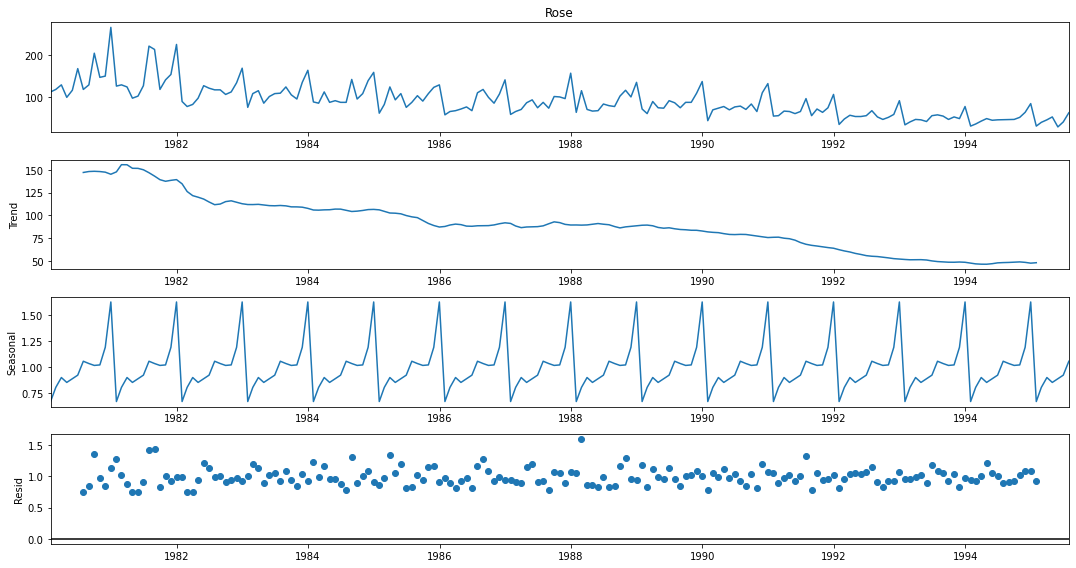

In [38]:
decomposition = seasonal_decompose(Rose['Rose'],model='multiplicative')
decomposition.plot();

In [39]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

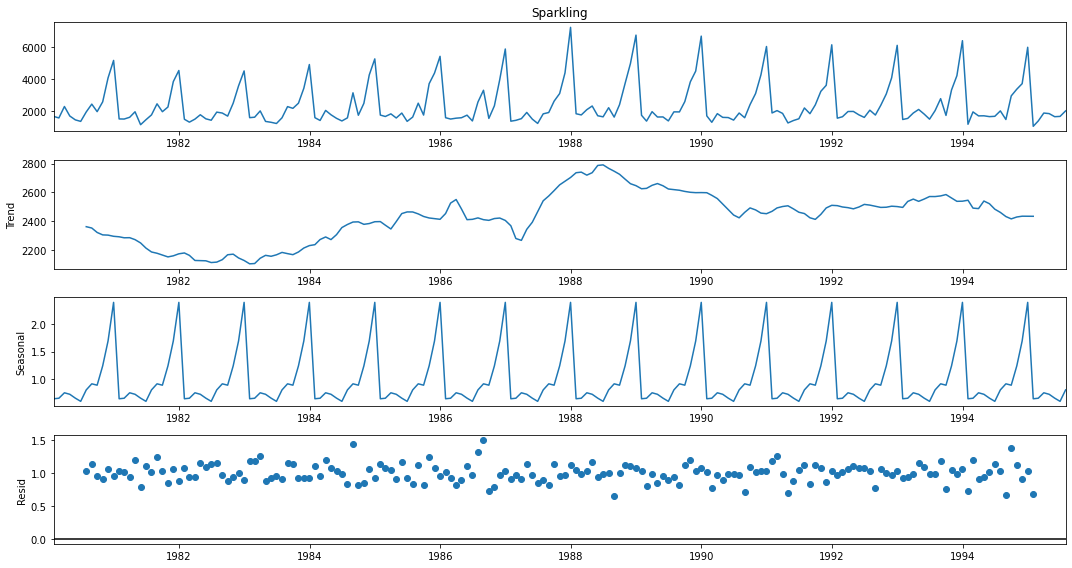

In [40]:
decomposition = seasonal_decompose(Sparkling['Sparkling'],model='multiplicative')
decomposition.plot();

In [41]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [42]:
Rose.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [43]:
Sparkling.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [44]:
Rose_train = Rose[Rose.index<='1990'] 
Rose_test = Rose[Rose.index>'1991']

In [45]:
Rose_test.head()

Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

In [46]:
Sparkling_train = Sparkling[Sparkling.index<='1990'] 
Sparkling_test = Sparkling[Sparkling.index>'1991']

In [47]:
Sparkling_test.head()

Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [48]:
print(Rose_train.shape)
print(Rose_test.shape)
print(Sparkling_train.shape)
print(Sparkling_test.shape)

(120, 1)
(55, 1)
(120, 1)
(55, 1)


In [49]:
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [50]:
# create class
model_SES_Rose = SimpleExpSmoothing(Rose_train,initialization_method='estimated')

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [51]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_Rose_autofit = model_SES_Rose.fit(optimized=True)

In [52]:
## Let us check the parameters
model_SES_Rose_autofit.params

{'smoothing_level': 0.10168680554032276,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.29817925255966,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [53]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_Rose = model_SES_Rose_autofit.forecast(steps=len(Rose_test))
SES_predict_Rose

1990-01-31    93.159174
1990-02-28    93.159174
1990-03-31    93.159174
1990-04-30    93.159174
1990-05-31    93.159174
1990-06-30    93.159174
1990-07-31    93.159174
1990-08-31    93.159174
1990-09-30    93.159174
1990-10-31    93.159174
1990-11-30    93.159174
1990-12-31    93.159174
1991-01-31    93.159174
1991-02-28    93.159174
1991-03-31    93.159174
1991-04-30    93.159174
1991-05-31    93.159174
1991-06-30    93.159174
1991-07-31    93.159174
1991-08-31    93.159174
1991-09-30    93.159174
1991-10-31    93.159174
1991-11-30    93.159174
1991-12-31    93.159174
1992-01-31    93.159174
1992-02-29    93.159174
1992-03-31    93.159174
1992-04-30    93.159174
1992-05-31    93.159174
1992-06-30    93.159174
1992-07-31    93.159174
1992-08-31    93.159174
1992-09-30    93.159174
1992-10-31    93.159174
1992-11-30    93.159174
1992-12-31    93.159174
1993-01-31    93.159174
1993-02-28    93.159174
1993-03-31    93.159174
1993-04-30    93.159174
1993-05-31    93.159174
1993-06-30    93

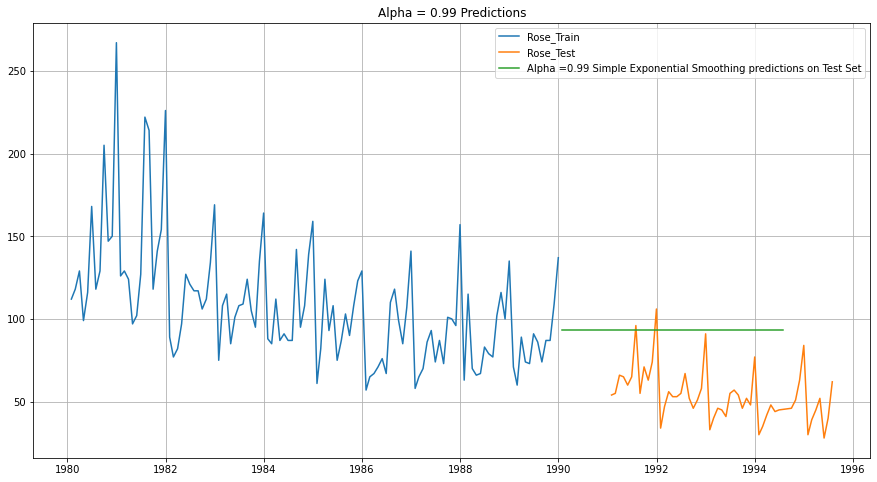

In [54]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Rose_train, label='Rose_Train')
plt.plot(Rose_test, label='Rose_Test')
plt.plot(SES_predict_Rose, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [55]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [56]:
print('SES RMSE:',mean_squared_error(Rose_test.values,SES_predict_Rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(Rose_test.values,SES_predict_Rose.values)[0])

SES RMSE: 42.346482173453005
SES RMSE (calculated using statsmodels): 42.34648217345301


In [57]:
resultsDf = pd.DataFrame({'Rose_Test RMSE': [em.rmse(Rose_test.values,SES_predict_Rose.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

Rose_Test RMSE
Alpha=0.99,SES       42.346482

In [58]:
# Initializing the Double Exponential Smoothing Model
model_DES_Rose = Holt(Rose_train,initialization_method='estimated')
# Fitting the model
model_DES_Rose = model_DES_Rose.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_Rose.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0008728485011432325, 'smoothing_trend': 5.3822876707002765e-06, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 138.92178123586777, 'initial_trend': -0.5184396348003133, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [59]:
# Forecasting using this model for the duration of the test set
DES_predict_Rose =  model_DES_Rose.forecast(len(Rose_test))
DES_predict_Rose

1990-01-31    76.191031
1990-02-28    75.672592
1990-03-31    75.154152
1990-04-30    74.635712
1990-05-31    74.117273
1990-06-30    73.598833
1990-07-31    73.080393
1990-08-31    72.561954
1990-09-30    72.043514
1990-10-31    71.525074
1990-11-30    71.006635
1990-12-31    70.488195
1991-01-31    69.969756
1991-02-28    69.451316
1991-03-31    68.932876
1991-04-30    68.414437
1991-05-31    67.895997
1991-06-30    67.377557
1991-07-31    66.859118
1991-08-31    66.340678
1991-09-30    65.822239
1991-10-31    65.303799
1991-11-30    64.785359
1991-12-31    64.266920
1992-01-31    63.748480
1992-02-29    63.230040
1992-03-31    62.711601
1992-04-30    62.193161
1992-05-31    61.674721
1992-06-30    61.156282
1992-07-31    60.637842
1992-08-31    60.119403
1992-09-30    59.600963
1992-10-31    59.082523
1992-11-30    58.564084
1992-12-31    58.045644
1993-01-31    57.527204
1993-02-28    57.008765
1993-03-31    56.490325
1993-04-30    55.971885
1993-05-31    55.453446
1993-06-30    54

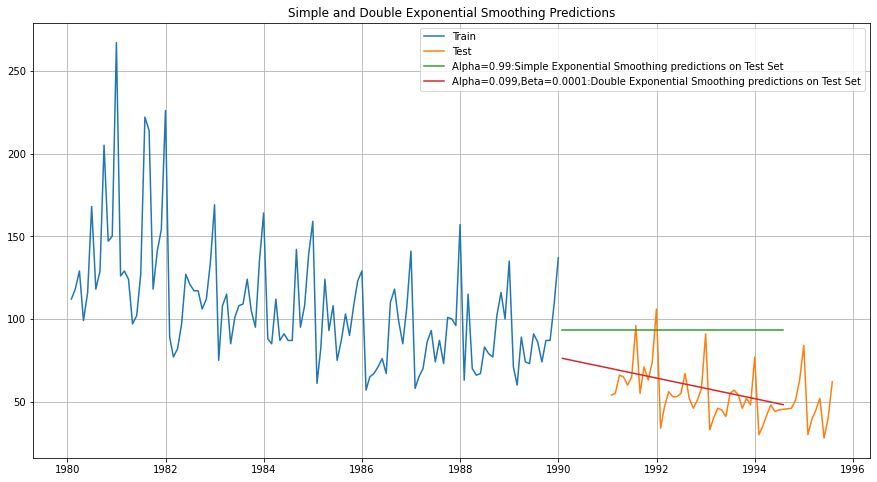

In [60]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Rose_train, label='Train')
plt.plot(Rose_test, label='Test')

plt.plot(SES_predict_Rose, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_Rose, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [61]:
print('DES RMSE:',mean_squared_error(Rose_test.values,DES_predict_Rose.values,squared=False))

DES RMSE: 16.74220356376017


In [62]:
resultsDf_temp = pd.DataFrame({'Rose_Test RMSE': [mean_squared_error(Rose_test.values,DES_predict_Rose.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Rose_Test RMSE
Alpha=0.99,SES                42.346482
Alpha=1,Beta=0.0189:DES       16.742204

In [278]:
# Initializing the Double Exponential Smoothing Model
model_TES_Rose = ExponentialSmoothing(Rose_train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES_Rose = model_TES_Rose.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_Rose.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08904861575646025, 'smoothing_trend': 2.489897981494328e-06, 'smoothing_seasonal': 0.0003979698957395684, 'damping_trend': nan, 'initial_level': 146.72847798959046, 'initial_trend': -0.5579348443816383, 'initial_seasons': array([-30.38524211, -19.61517613, -11.23410949, -23.19999423,
       -12.66687612,  -7.70907578,   3.1420854 ,  10.5433936 ,
         4.86910063,   4.6532506 ,  19.89449626,  63.63212917]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [279]:
# Forecasting using this model for the duration of the test set
TES_predict_Rose =  model_TES_Rose.forecast(len(Rose_test))
TES_predict_Rose

1990-01-31     48.939988
1990-02-28     59.152907
1990-03-31     66.975889
1990-04-30     54.451367
1990-05-31     64.426252
1990-06-30     68.827325
1990-07-31     79.119731
1990-08-31     85.963331
1990-09-30     79.730882
1990-10-31     78.956651
1990-11-30     93.640467
1990-12-31    136.825024
1991-01-31     42.244773
1991-02-28     52.457692
1991-03-31     60.280674
1991-04-30     47.756153
1991-05-31     57.731038
1991-06-30     62.132111
1991-07-31     72.424516
1991-08-31     79.268116
1991-09-30     73.035667
1991-10-31     72.261436
1991-11-30     86.945252
1991-12-31    130.129809
1992-01-31     35.549558
1992-02-29     45.762477
1992-03-31     53.585459
1992-04-30     41.060938
1992-05-31     51.035823
1992-06-30     55.436896
1992-07-31     65.729301
1992-08-31     72.572902
1992-09-30     66.340452
1992-10-31     65.566222
1992-11-30     80.250037
1992-12-31    123.434594
1993-01-31     28.854343
1993-02-28     39.067262
1993-03-31     46.890245
1993-04-30     34.365723


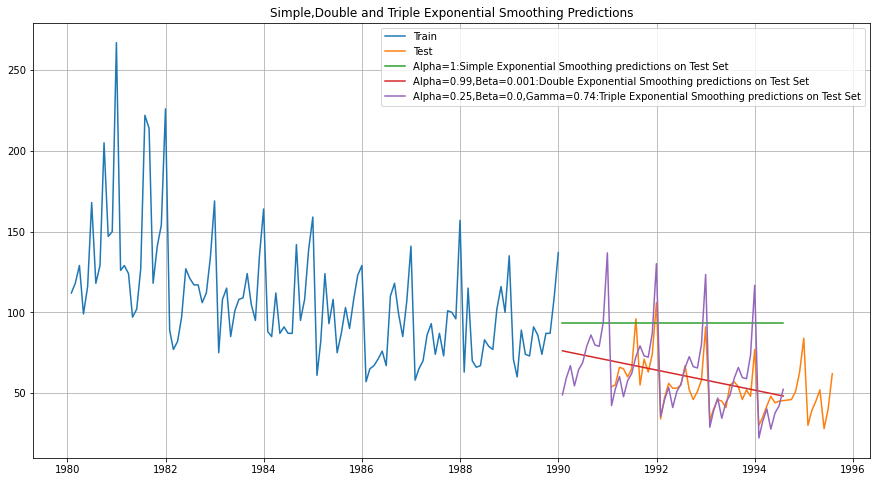

In [280]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Rose_train, label='Train')
plt.plot(Rose_test, label='Test')

plt.plot(SES_predict_Rose, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_Rose, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_Rose, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [281]:
print('TES RMSE:',mean_squared_error(Rose_test.values,TES_predict_Rose.values,squared=False))

TES RMSE: 16.651903949919145


In [67]:
resultsDf_temp = pd.DataFrame({'Rose_Test RMSE': [mean_squared_error(Rose_test.values,TES_predict_Rose.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Rose_Test RMSE
Alpha=0.99,SES                           42.346482
Alpha=1,Beta=0.0189:DES                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES       16.651904

In [68]:
# Initializing the Double Exponential Smoothing Model
model_TES_am_Rose = ExponentialSmoothing(Rose_train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am_Rose = model_TES_am_Rose.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am_Rose.params)

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06277803469477272, 'smoothing_trend': 0.05912287184190225, 'smoothing_seasonal': 4.5689534297583474e-05, 'damping_trend': nan, 'initial_level': 147.87334968927365, 'initial_trend': -0.9123290858199745, 'initial_seasons': array([0.77521857, 0.86492117, 0.94628197, 0.81598863, 0.93172589,
       1.01499093, 1.12051393, 1.20162863, 1.12673631, 1.11424925,
       1.27202501, 1.77057455]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [69]:
# Forecasting using this model for the duration of the test set
TES_predict_am_Rose =  model_TES_am_Rose.forecast(len(Rose_test))
TES_predict_am_Rose

1990-01-31     61.605688
1990-02-28     68.696325
1990-03-31     75.115355
1990-04-30     64.736529
1990-05-31     73.875212
1990-06-30     80.429068
1990-07-31     88.740539
1990-08-31     95.109885
1990-09-30     89.132164
1990-10-31     88.094646
1990-11-30    100.510936
1990-12-31    139.821958
1991-01-31     61.184276
1991-02-28     68.226143
1991-03-31     74.600945
1991-04-30     64.292942
1991-05-31     73.368716
1991-06-30     79.877324
1991-07-31     88.131429
1991-08-31     94.456682
1991-09-30     88.519666
1991-10-31     87.488930
1991-11-30     99.819453
1991-12-31    138.859476
1992-01-31     60.762865
1992-02-29     67.755960
1992-03-31     74.086535
1992-04-30     63.849356
1992-05-31     72.862221
1992-06-30     79.325579
1992-07-31     87.522319
1992-08-31     93.803480
1992-09-30     87.907167
1992-10-31     86.883215
1992-11-30     99.127970
1992-12-31    137.896993
1993-01-31     60.341453
1993-02-28     67.285777
1993-03-31     73.572124
1993-04-30     63.405769


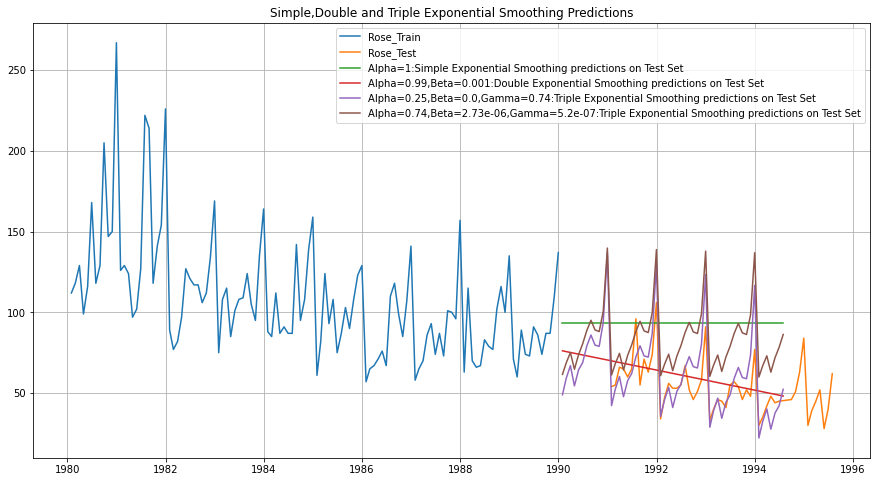

In [70]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Rose_train, label='Rose_Train')
plt.plot(Rose_test, label='Rose_Test')

plt.plot(SES_predict_Rose, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_Rose, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_Rose, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_Rose, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [71]:
print('TES_am RMSE:',mean_squared_error(Rose_test.values,TES_predict_am_Rose.values,squared=False))

TES_am RMSE: 31.94826768112503


In [72]:
resultsDf_temp = pd.DataFrame({'Rose_Test RMSE': [mean_squared_error(Rose_test.values,TES_predict_am_Rose.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268

In [73]:
train_time_Rose = [i+1 for i in range(len(Rose_train))]
test_time_Rose = [i+256 for i in range(len(Rose_test))]
print('Training Time instance','\n',train_time_Rose)
print('Test Time instance','\n',test_time_Rose)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [74]:
LinearRegression_train_Rose = Rose_train.copy()
LinearRegression_test_Rose = Rose_test.copy()

In [75]:
LinearRegression_train_Rose['time'] = train_time_Rose
LinearRegression_test_Rose['time'] = test_time_Rose

print('First few rows of Training Data')
display(LinearRegression_train_Rose.head())
print('Last few rows of Training Data')
display(LinearRegression_train_Rose.tail())
print('First few rows of Test Data')
display(LinearRegression_test_Rose.head())
print('Last few rows of Test Data')
display(LinearRegression_test_Rose.tail())

First few rows of Training Data


Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5

Last few rows of Training Data


Rose  time
Time_Stamp             
1989-08-31   74.0   116
1989-09-30   87.0   117
1989-10-31   87.0   118
1989-11-30  109.0   119
1989-12-31  137.0   120

First few rows of Test Data


Rose  time
Time_Stamp            
1991-01-31  54.0   256
1991-02-28  55.0   257
1991-03-31  66.0   258
1991-04-30  65.0   259
1991-05-31  60.0   260

Last few rows of Test Data


Rose  time
Time_Stamp            
1995-03-31  45.0   306
1995-04-30  52.0   307
1995-05-31  28.0   308
1995-06-30  40.0   309
1995-07-31  62.0   310

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [78]:
lr.fit(LinearRegression_train_Rose[['time']],LinearRegression_train_Rose['Rose'])

LinearRegression()

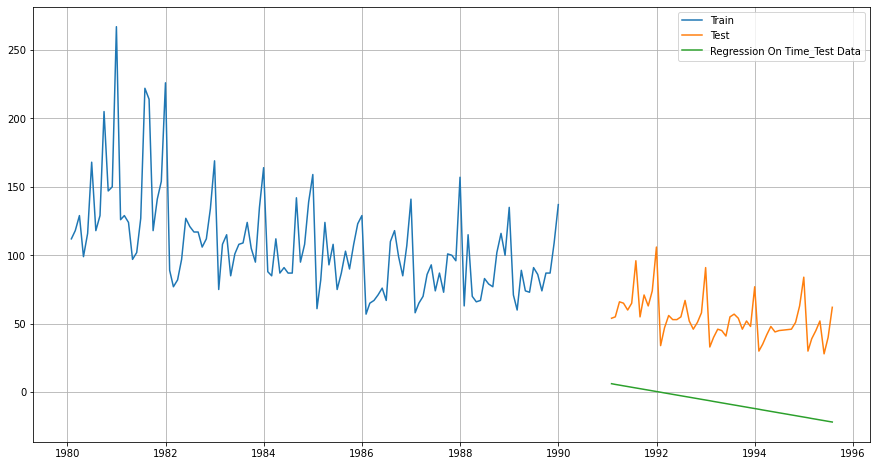

In [79]:
train_predictions_model1 = lr.predict(LinearRegression_train_Rose[['time']])
LinearRegression_train_Rose['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test_Rose[['time']])
LinearRegression_test_Rose['RegOnTime'] = test_predictions_model1

plt.plot( Rose_train['Rose'], label='Train')
plt.plot(Rose_test['Rose'], label='Test')
plt.plot(LinearRegression_test_Rose['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [80]:
rmse_model1_test_Rose = metrics.mean_squared_error(Rose_test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test_Rose))

For RegressionOnTime forecast on the Test Data,  RMSE is 63.366 


In [81]:
resultsDf_temp = pd.DataFrame({'Rose_Test RMSE': [rmse_model1_test_Rose]}
                           ,index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106

In [82]:
NaiveModel_train_Rose = Rose_train.copy()
NaiveModel_test_Rose = Rose_test.copy()

In [83]:
NaiveModel_test_Rose['naive'] = np.asarray(Rose_train['Rose'])[len(np.asarray(Rose_train['Rose']))-1]
NaiveModel_test_Rose['naive'].head()

Time_Stamp
1991-01-31    137.0
1991-02-28    137.0
1991-03-31    137.0
1991-04-30    137.0
1991-05-31    137.0
Name: naive, dtype: float64

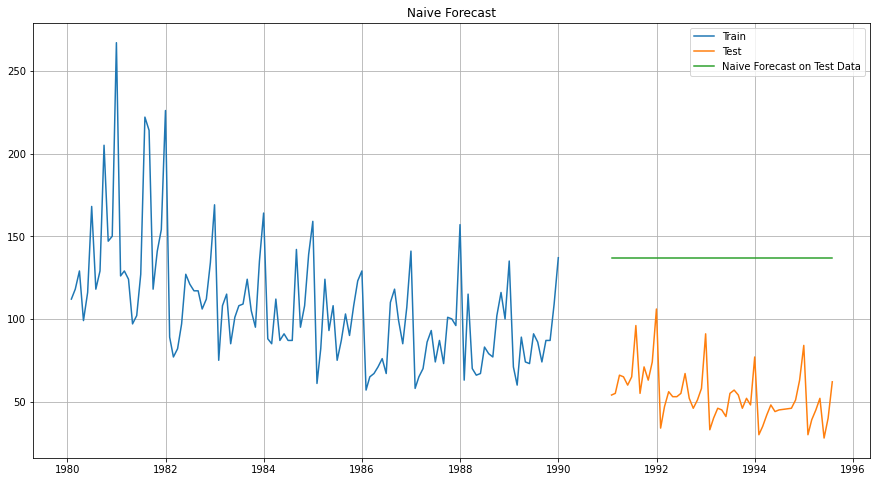

In [84]:
plt.plot(NaiveModel_train_Rose['Rose'], label='Train')
plt.plot(Rose_test['Rose'], label='Test')

plt.plot(NaiveModel_test_Rose['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [85]:
rmse_model2_test_Rose = metrics.mean_squared_error(Rose_test['Rose'],NaiveModel_test_Rose['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_Rose))

For Naive forecast on the Test Data,  RMSE is 84.626


In [86]:
resultsDf_temp = pd.DataFrame({'Rose_Test RMSE': [rmse_model2_test_Rose]}
                           ,index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106
NaiveModel                                               84.625867

In [87]:
SimpleAverage_train_Rose = Rose_train.copy()
SimpleAverage_test_Rose = Rose_test.copy()

In [88]:
SimpleAverage_test_Rose['mean_forecast'] = Rose_train['Rose'].mean()
SimpleAverage_test_Rose.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     107.558333
1991-02-28  55.0     107.558333
1991-03-31  66.0     107.558333
1991-04-30  65.0     107.558333
1991-05-31  60.0     107.558333

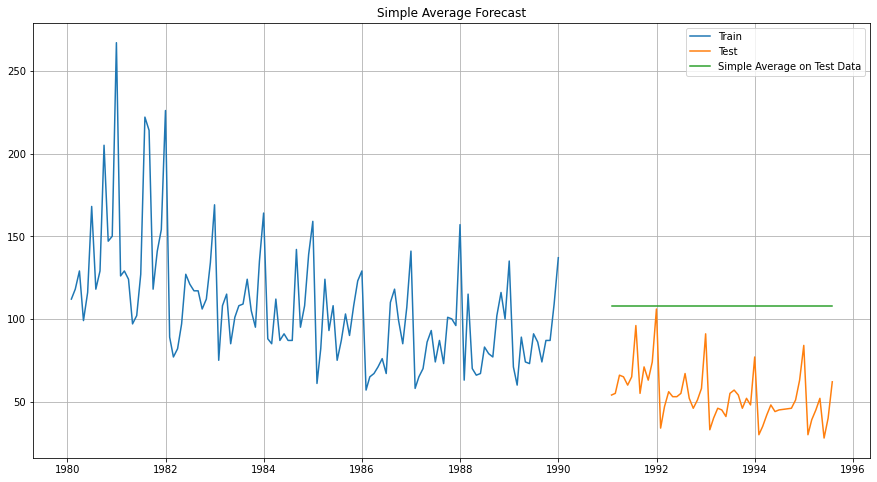

In [89]:
plt.plot(SimpleAverage_train_Rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_Rose['Rose'], label='Test')

plt.plot(SimpleAverage_test_Rose['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [90]:
rmse_model3_test_Rose = metrics.mean_squared_error(Rose_test['Rose'],SimpleAverage_test_Rose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test_Rose))

For Simple Average forecast on the Test Data,  RMSE is 55.968


In [91]:
resultsDf_temp = pd.DataFrame({'Rose_Test RMSE': [rmse_model3_test_Rose]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106
NaiveModel                                               84.625867
SimpleAverageModel                                       55.968452

In [282]:
MovingAverage_Rose = Rose.copy()
MovingAverage_Rose.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [283]:
MovingAverage_Rose['Trailing_2'] = MovingAverage_Rose['Rose'].rolling(2).mean()
MovingAverage_Rose['Trailing_4'] = MovingAverage_Rose['Rose'].rolling(4).mean()
MovingAverage_Rose['Trailing_6'] = MovingAverage_Rose['Rose'].rolling(6).mean()
MovingAverage_Rose['Trailing_9'] = MovingAverage_Rose['Rose'].rolling(9).mean()

MovingAverage_Rose.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

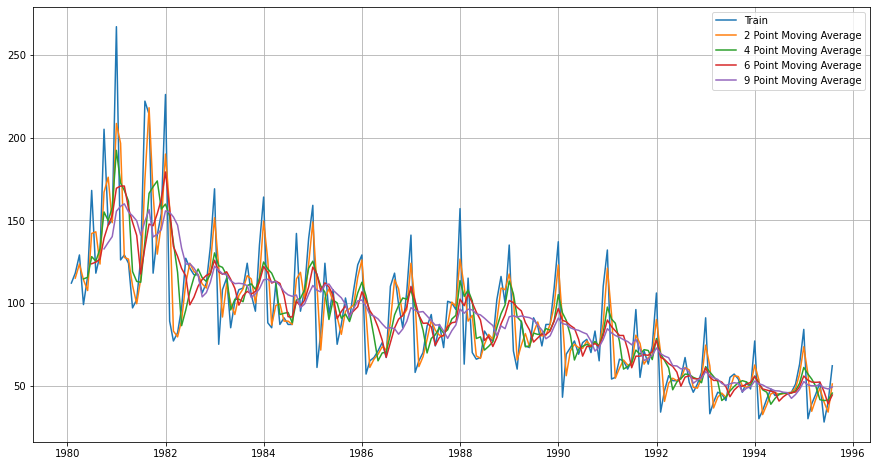

In [284]:
plt.plot(MovingAverage_Rose['Rose'], label='Train')
plt.plot(MovingAverage_Rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [285]:
#Creating train and test set 
trailing_MovingAverage_Rose_train=MovingAverage_Rose[MovingAverage_Rose.index<='1990'] 
trailing_MovingAverage_Rose_test=MovingAverage_Rose[MovingAverage_Rose.index>'1991']

In [288]:
trailing_MovingAverage_Rose_test.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                      
1991-01-31  54.0        93.0       90.25   85.666667   81.888889
1991-02-28  55.0        54.5       87.75   83.166667   80.333333
1991-03-31  66.0        60.5       76.75   80.333333   79.222222
1991-04-30  65.0        65.5       60.00   80.333333   77.777778
1991-05-31  60.0        62.5       61.50   72.000000   76.666667

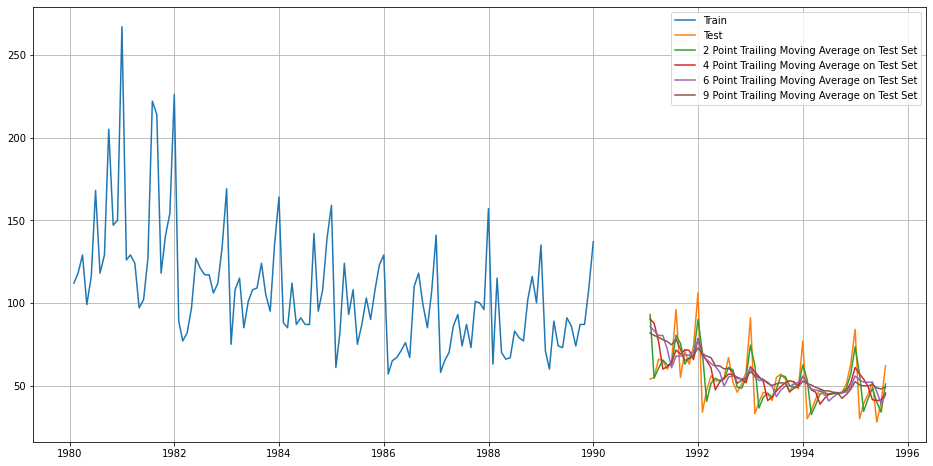

In [96]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_Rose_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_Rose_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_Rose_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_Rose_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_Rose_test['Trailing_6'], label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_Rose_test['Trailing_9'], label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [97]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2_Rose = metrics.mean_squared_error(Rose_test['Rose'],trailing_MovingAverage_Rose_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2_Rose))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4_Rose = metrics.mean_squared_error(Rose_test['Rose'],trailing_MovingAverage_Rose_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4_Rose))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6_Rose = metrics.mean_squared_error(Rose_test['Rose'],trailing_MovingAverage_Rose_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6_Rose))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9_Rose = metrics.mean_squared_error(Rose_test['Rose'],trailing_MovingAverage_Rose_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9_Rose))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [98]:
resultsDf_temp = pd.DataFrame({'Rose_Test RMSE': [rmse_model4_test_2_Rose,rmse_model4_test_4_Rose
                                          ,rmse_model4_test_6_Rose,rmse_model4_test_9_Rose]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106
NaiveModel                                               84.625867
SimpleAverageModel                                       55.968452
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630

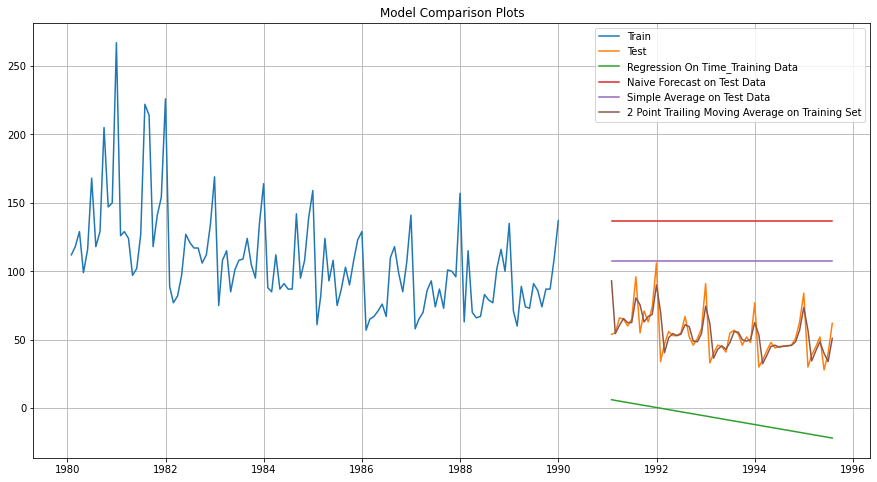

In [99]:
## Plotting on both Training and Test data

plt.plot(Rose_train['Rose'], label='Train')
plt.plot(Rose_test['Rose'], label='Test')

plt.plot(LinearRegression_test_Rose['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test_Rose['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_Rose['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_Rose_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [100]:
# create class
model_SES_Sparkling = SimpleExpSmoothing(Sparkling_train,initialization_method='estimated')

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [101]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_Sparkling_autofit = model_SES_Sparkling.fit(optimized=True)

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [102]:
## Let us check the parameters
model_SES_Sparkling_autofit.params

{'smoothing_level': 0.04847930809986732,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2152.0664181972584,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [103]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_Sparkling = model_SES_Sparkling_autofit.forecast(steps=len(Sparkling_test))
SES_predict_Sparkling

1990-01-31    2814.805734
1990-02-28    2814.805734
1990-03-31    2814.805734
1990-04-30    2814.805734
1990-05-31    2814.805734
1990-06-30    2814.805734
1990-07-31    2814.805734
1990-08-31    2814.805734
1990-09-30    2814.805734
1990-10-31    2814.805734
1990-11-30    2814.805734
1990-12-31    2814.805734
1991-01-31    2814.805734
1991-02-28    2814.805734
1991-03-31    2814.805734
1991-04-30    2814.805734
1991-05-31    2814.805734
1991-06-30    2814.805734
1991-07-31    2814.805734
1991-08-31    2814.805734
1991-09-30    2814.805734
1991-10-31    2814.805734
1991-11-30    2814.805734
1991-12-31    2814.805734
1992-01-31    2814.805734
1992-02-29    2814.805734
1992-03-31    2814.805734
1992-04-30    2814.805734
1992-05-31    2814.805734
1992-06-30    2814.805734
1992-07-31    2814.805734
1992-08-31    2814.805734
1992-09-30    2814.805734
1992-10-31    2814.805734
1992-11-30    2814.805734
1992-12-31    2814.805734
1993-01-31    2814.805734
1993-02-28    2814.805734
1993-03-31  

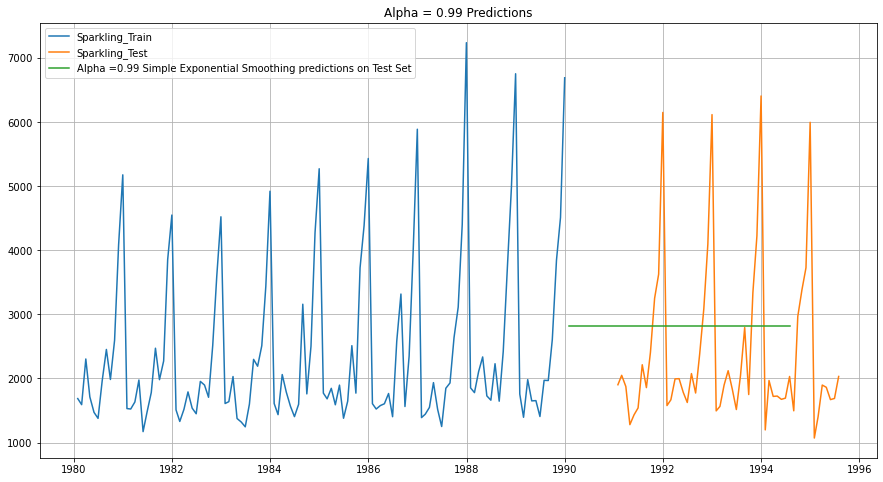

In [104]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Sparkling_train, label='Sparkling_Train')
plt.plot(Sparkling_test, label='Sparkling_Test')
plt.plot(SES_predict_Sparkling, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [105]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [106]:
print('SES RMSE:',mean_squared_error(Sparkling_test.values,SES_predict_Sparkling.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(Sparkling_test.values,SES_predict_Sparkling.values)[0])

SES RMSE: 1341.113564192987
SES RMSE (calculated using statsmodels): 1341.113564192987


In [107]:
resultsDf_S = pd.DataFrame({'Sparkling_Test RMSE': [em.rmse(Sparkling_test.values,SES_predict_Sparkling.values)[0]]}
                         ,index=['Alpha=0.99,SES'])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES          1341.113564

In [108]:
# Initializing the Double Exponential Smoothing Model
model_DES_Sparkling = Holt(Sparkling_train,initialization_method='estimated')
# Fitting the model
model_DES_Sparkling = model_DES_Sparkling.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES_Sparkling.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [109]:
# Forecasting using this model for the duration of the test set
DES_predict_Sparkling =  model_DES_Sparkling.forecast(len(Sparkling_test))
DES_predict_Sparkling

1990-01-31    5945.207026
1990-02-28    6019.622411
1990-03-31    6094.037795
1990-04-30    6168.453179
1990-05-31    6242.868563
1990-06-30    6317.283947
1990-07-31    6391.699332
1990-08-31    6466.114716
1990-09-30    6540.530100
1990-10-31    6614.945484
1990-11-30    6689.360868
1990-12-31    6763.776252
1991-01-31    6838.191637
1991-02-28    6912.607021
1991-03-31    6987.022405
1991-04-30    7061.437789
1991-05-31    7135.853173
1991-06-30    7210.268557
1991-07-31    7284.683942
1991-08-31    7359.099326
1991-09-30    7433.514710
1991-10-31    7507.930094
1991-11-30    7582.345478
1991-12-31    7656.760863
1992-01-31    7731.176247
1992-02-29    7805.591631
1992-03-31    7880.007015
1992-04-30    7954.422399
1992-05-31    8028.837783
1992-06-30    8103.253168
1992-07-31    8177.668552
1992-08-31    8252.083936
1992-09-30    8326.499320
1992-10-31    8400.914704
1992-11-30    8475.330088
1992-12-31    8549.745473
1993-01-31    8624.160857
1993-02-28    8698.576241
1993-03-31  

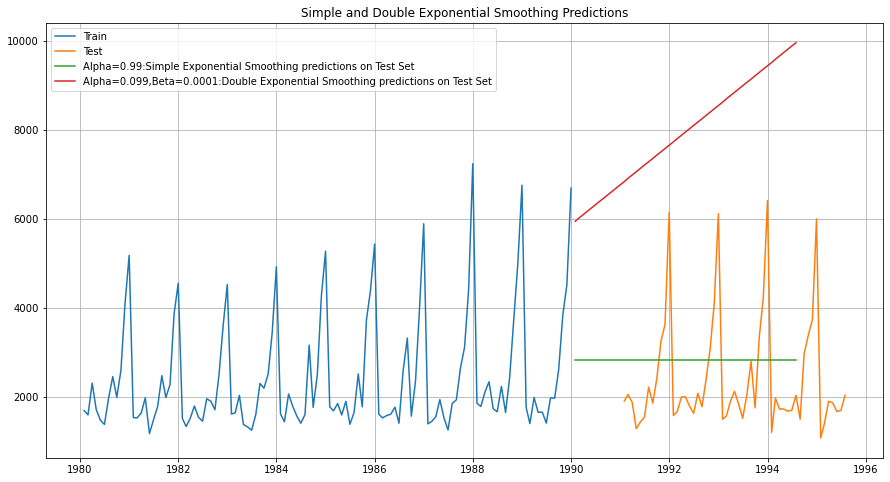

In [110]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Sparkling_train, label='Train')
plt.plot(Sparkling_test, label='Test')

plt.plot(SES_predict_Sparkling, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_Sparkling, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [111]:
print('DES RMSE:',mean_squared_error(Sparkling_test.values,DES_predict_Sparkling.values,squared=False))

DES RMSE: 5812.989689951288


In [112]:
resultsDf_temp = pd.DataFrame({'Sparkling_Test RMSE': [mean_squared_error(Sparkling_test.values,DES_predict_Sparkling.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf_S = pd.concat([resultsDf_S, resultsDf_temp])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                   1341.113564
Alpha=1,Beta=0.0189:DES          5812.989690

In [113]:
# Initializing the Double Exponential Smoothing Model
model_TES_Sparkling = ExponentialSmoothing(Sparkling_train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES_Sparkling = model_TES_Sparkling.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_Sparkling.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0759641687095523, 'smoothing_trend': 0.043361140048357866, 'smoothing_seasonal': 0.47864411870083345, 'damping_trend': nan, 'initial_level': 2356.4861430714755, 'initial_trend': -2.630242502284812, 'initial_seasons': array([-636.47315839, -723.16861747, -398.20081795, -473.6144461 ,
       -808.72366862, -815.63357971, -384.28736074,   73.23225   ,
       -237.8112009 ,  272.2049764 , 1541.93750182, 2590.48893415]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [114]:
# Forecasting using this model for the duration of the test set
TES_predict_Sparkling =  model_TES_Sparkling.forecast(len(Sparkling_test))
TES_predict_Sparkling

1990-01-31    1775.697549
1990-02-28    1581.180657
1990-03-31    2001.648036
1990-04-30    1934.296784
1990-05-31    1756.013158
1990-06-30    1549.048313
1990-07-31    2149.073815
1990-08-31    2140.721343
1990-09-30    2593.831478
1990-10-31    3709.218699
1990-11-30    4669.917172
1990-12-31    6706.027063
1991-01-31    1828.807280
1991-02-28    1634.290388
1991-03-31    2054.757766
1991-04-30    1987.406515
1991-05-31    1809.122889
1991-06-30    1602.158044
1991-07-31    2202.183546
1991-08-31    2193.831074
1991-09-30    2646.941209
1991-10-31    3762.328430
1991-11-30    4723.026902
1991-12-31    6759.136794
1992-01-31    1881.917011
1992-02-29    1687.400118
1992-03-31    2107.867497
1992-04-30    2040.516245
1992-05-31    1862.232619
1992-06-30    1655.267774
1992-07-31    2255.293276
1992-08-31    2246.940805
1992-09-30    2700.050940
1992-10-31    3815.438161
1992-11-30    4776.136633
1992-12-31    6812.246524
1993-01-31    1935.026741
1993-02-28    1740.509849
1993-03-31  

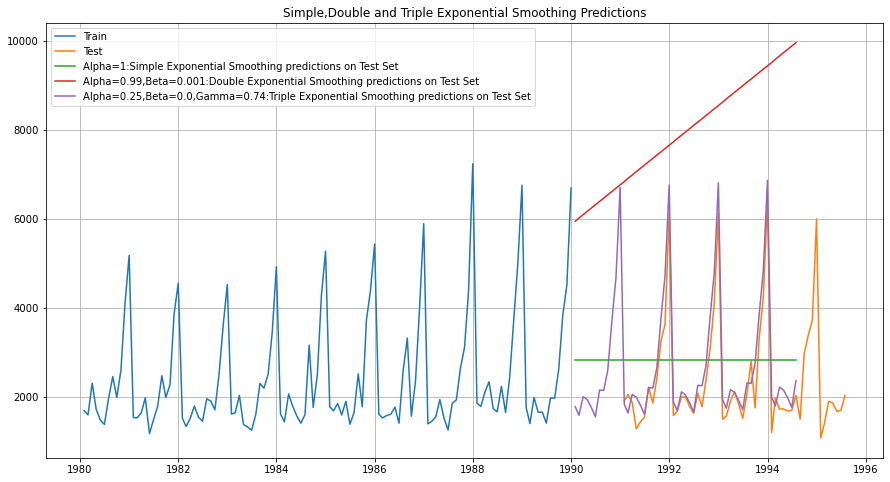

In [115]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Sparkling_train, label='Train')
plt.plot(Sparkling_test, label='Test')

plt.plot(SES_predict_Sparkling, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_Sparkling, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_Sparkling, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [116]:
print('TES RMSE:',mean_squared_error(Sparkling_test.values,TES_predict_Sparkling.values,squared=False))

TES RMSE: 459.42004906382704


In [117]:
resultsDf_temp = pd.DataFrame({'Sparkling_Test RMSE': [mean_squared_error(Sparkling_test.values,TES_predict_Sparkling.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf_S = pd.concat([resultsDf_S, resultsDf_temp])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                              1341.113564
Alpha=1,Beta=0.0189:DES                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES           459.420049

In [118]:
# Initializing the Double Exponential Smoothing Model
model_TES_am_Sparkling = ExponentialSmoothing(Sparkling_train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am_Sparkling = model_TES_am_Sparkling.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am_Sparkling.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07588861117792611, 'smoothing_trend': 0.06503510925352711, 'smoothing_seasonal': 0.30815324446359105, 'damping_trend': nan, 'initial_level': 2356.50379778347, 'initial_trend': -12.45517910149929, 'initial_seasons': array([0.7177309 , 0.69227347, 0.90169916, 0.80478797, 0.65298396,
       0.64308169, 0.87599006, 1.14497765, 0.91558725, 1.23528287,
       1.90476081, 2.42759818]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [119]:
# Forecasting using this model for the duration of the test set
TES_predict_am_Sparkling =  model_TES_am_Sparkling.forecast(len(Sparkling_test))
TES_predict_am_Sparkling

1990-01-31    1771.551711
1990-02-28    1620.874686
1990-03-31    1993.507591
1990-04-30    1948.533973
1990-05-31    1743.194189
1990-06-30    1515.894395
1990-07-31    2133.655081
1990-08-31    2322.727674
1990-09-30    2472.935178
1990-10-31    3555.622791
1990-11-30    4694.082748
1990-12-31    6651.018572
1991-01-31    1797.448504
1991-02-28    1644.540032
1991-03-31    2022.578140
1991-04-30    1976.914201
1991-05-31    1768.552882
1991-06-30    1537.919799
1991-07-31    2164.618835
1991-08-31    2356.394549
1991-09-30    2508.735998
1991-10-31    3607.035715
1991-11-30    4761.875672
1991-12-31    6746.958508
1992-01-31    1823.345297
1992-02-29    1668.205378
1992-03-31    2051.648689
1992-04-30    2005.294429
1992-05-31    1793.911575
1992-06-30    1559.945202
1992-07-31    2195.582590
1992-08-31    2390.061423
1992-09-30    2544.536819
1992-10-31    3658.448640
1992-11-30    4829.668597
1992-12-31    6842.898444
1993-01-31    1849.242089
1993-02-28    1691.870724
1993-03-31  

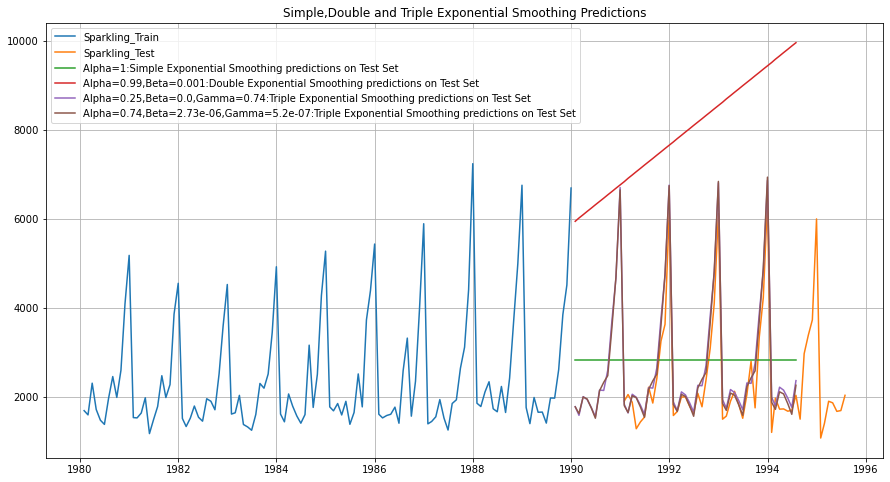

In [120]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Sparkling_train, label='Sparkling_Train')
plt.plot(Sparkling_test, label='Sparkling_Test')

plt.plot(SES_predict_Sparkling, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_Sparkling, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_Sparkling, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_Sparkling, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [121]:
print('TES_am RMSE:',mean_squared_error(Sparkling_test.values,TES_predict_am_Sparkling.values,squared=False))

TES_am RMSE: 441.3820966992331


In [122]:
resultsDf_temp = pd.DataFrame({'Sparkling_Test RMSE': [mean_squared_error(Sparkling_test.values,TES_predict_am_Sparkling.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf_S = pd.concat([resultsDf_S, resultsDf_temp])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097

In [123]:
train_time_Sparkling = [i+1 for i in range(len(Sparkling_train))]
test_time_Sparkling = [i+256 for i in range(len(Sparkling_test))]
print('Training Time instance','\n',train_time_Sparkling)
print('Test Time instance','\n',test_time_Sparkling)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [124]:
LinearRegression_train_Sparkling = Sparkling_train.copy()
LinearRegression_test_Sparkling = Sparkling_test.copy()

In [125]:
LinearRegression_train_Sparkling['time'] = train_time_Sparkling
LinearRegression_test_Sparkling['time'] = test_time_Sparkling

print('First few rows of Training Data')
display(LinearRegression_train_Sparkling.head())
print('Last few rows of Training Data')
display(LinearRegression_train_Sparkling.tail())
print('First few rows of Test Data')
display(LinearRegression_test_Sparkling.head())
print('Last few rows of Test Data')
display(LinearRegression_test_Sparkling.tail())

First few rows of Training Data


Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Last few rows of Training Data


Sparkling  time
Time_Stamp                 
1989-08-31       1968   116
1989-09-30       2608   117
1989-10-31       3845   118
1989-11-30       4514   119
1989-12-31       6694   120

First few rows of Test Data


Sparkling  time
Time_Stamp                 
1991-01-31       1902   256
1991-02-28       2049   257
1991-03-31       1874   258
1991-04-30       1279   259
1991-05-31       1432   260

Last few rows of Test Data


Sparkling  time
Time_Stamp                 
1995-03-31       1897   306
1995-04-30       1862   307
1995-05-31       1670   308
1995-06-30       1688   309
1995-07-31       2031   310

In [126]:
lr = LinearRegression()

In [127]:
lr.fit(LinearRegression_train_Sparkling[['time']],LinearRegression_train_Sparkling['Sparkling'])

LinearRegression()

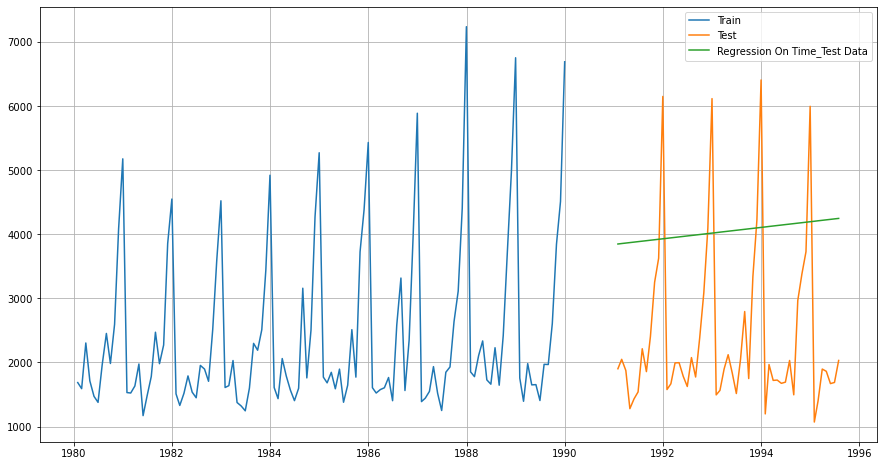

In [128]:
train_predictions_model1 = lr.predict(LinearRegression_train_Sparkling[['time']])
LinearRegression_train_Sparkling['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test_Sparkling[['time']])
LinearRegression_test_Sparkling['RegOnTime'] = test_predictions_model1

plt.plot( Sparkling_train['Sparkling'], label='Train')
plt.plot(Sparkling_test['Sparkling'], label='Test')
plt.plot(LinearRegression_test_Sparkling['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [129]:
rmse_model1_test_Sparkling = metrics.mean_squared_error(Sparkling_test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test_Sparkling))

For RegressionOnTime forecast on the Test Data,  RMSE is 2086.289 


In [130]:
resultsDf_temp = pd.DataFrame({'Sparkling_Test RMSE': [rmse_model1_test_Sparkling]}
                           ,index=['RegressionOnTime'])

resultsDf_S = pd.concat([resultsDf_S, resultsDf_temp])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660

In [131]:
NaiveModel_train_Sparkling = Sparkling_train.copy()
NaiveModel_test_Sparkling = Sparkling_test.copy()

In [132]:
NaiveModel_test_Sparkling['naive'] = np.asarray(Sparkling_train['Sparkling'])[len(np.asarray(Sparkling_train['Sparkling']))-1]
NaiveModel_test_Sparkling['naive'].head()

Time_Stamp
1991-01-31    6694
1991-02-28    6694
1991-03-31    6694
1991-04-30    6694
1991-05-31    6694
Name: naive, dtype: int64

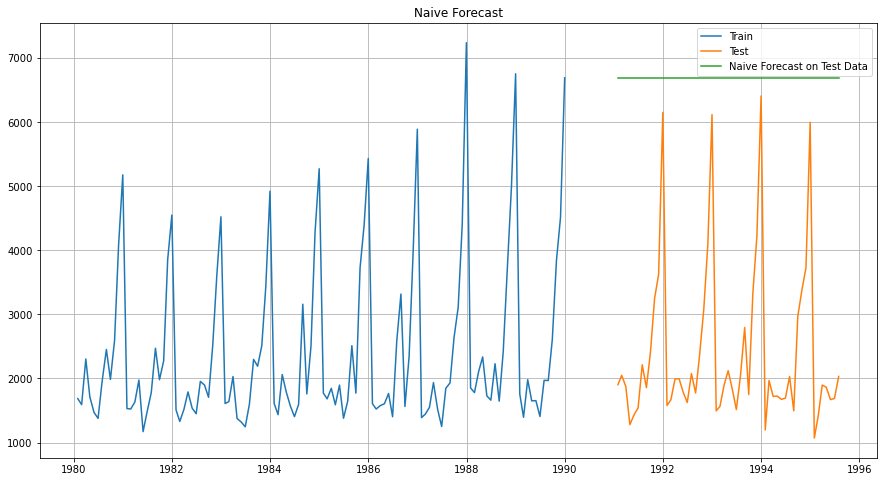

In [133]:
plt.plot(NaiveModel_train_Sparkling['Sparkling'], label='Train')
plt.plot(Sparkling_test['Sparkling'], label='Test')

plt.plot(NaiveModel_test_Sparkling['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [134]:
rmse_model2_test_Sparkling = metrics.mean_squared_error(Sparkling_test['Sparkling'],NaiveModel_test_Sparkling['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_Sparkling))

For Naive forecast on the Test Data,  RMSE is 4480.133


In [135]:
resultsDf_temp = pd.DataFrame({'Sparkling_Test RMSE': [rmse_model2_test_Sparkling]}
                           ,index=['NaiveModel'])

resultsDf_S = pd.concat([resultsDf_S, resultsDf_temp])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660
NaiveModel                                                  4480.132553

In [136]:
SimpleAverage_train_Sparkling = Sparkling_train.copy()
SimpleAverage_test_Sparkling = Sparkling_test.copy()

In [137]:
SimpleAverage_test_Sparkling['mean_forecast'] = Sparkling_train['Sparkling'].mean()
SimpleAverage_test_Sparkling.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2402.683333
1991-02-28       2049    2402.683333
1991-03-31       1874    2402.683333
1991-04-30       1279    2402.683333
1991-05-31       1432    2402.683333

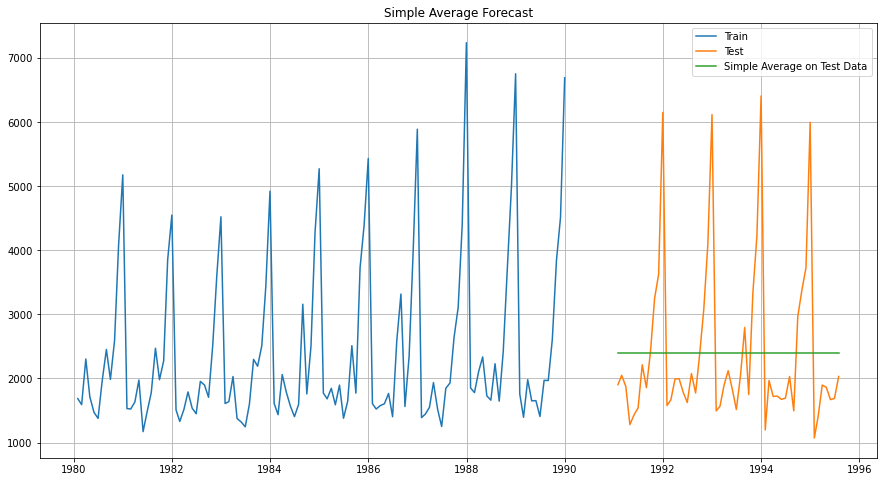

In [138]:
plt.plot(SimpleAverage_train_Sparkling['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_Sparkling['Sparkling'], label='Test')

plt.plot(SimpleAverage_test_Sparkling['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [139]:
rmse_model3_test_Sparkling = metrics.mean_squared_error(Sparkling_test['Sparkling'],SimpleAverage_test_Sparkling['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test_Sparkling))

For Simple Average forecast on the Test Data,  RMSE is 1275.078


In [140]:
resultsDf_temp = pd.DataFrame({'Sparkling_Test RMSE': [rmse_model3_test_Sparkling]}
                           ,index=['SimpleAverageModel'])

resultsDf_S = pd.concat([resultsDf_S, resultsDf_temp])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660
NaiveModel                                                  4480.132553
SimpleAverageModel                                          1275.078288

In [141]:
MovingAverage_Sparkling = Sparkling.copy()
MovingAverage_Sparkling.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [142]:
MovingAverage_Sparkling['Trailing_2'] = MovingAverage_Sparkling['Sparkling'].rolling(2).mean()
MovingAverage_Sparkling['Trailing_4'] = MovingAverage_Sparkling['Sparkling'].rolling(4).mean()
MovingAverage_Sparkling['Trailing_6'] = MovingAverage_Sparkling['Sparkling'].rolling(6).mean()
MovingAverage_Sparkling['Trailing_9'] = MovingAverage_Sparkling['Sparkling'].rolling(9).mean()

MovingAverage_Sparkling.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

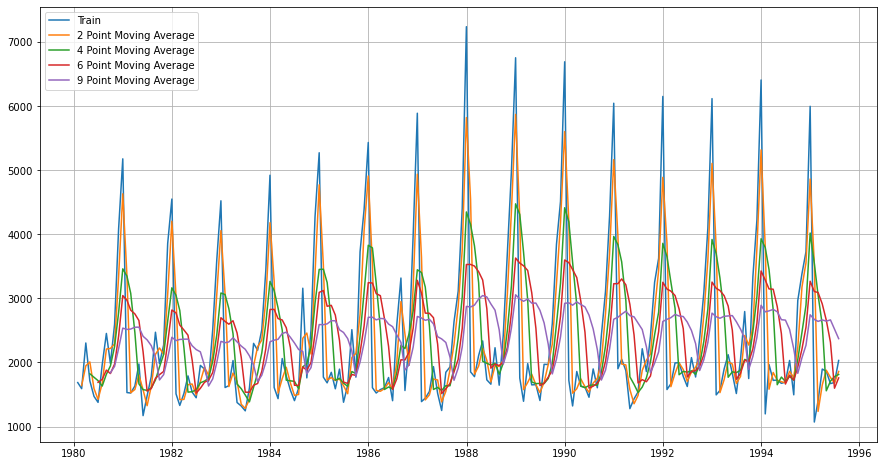

In [143]:
plt.plot(MovingAverage_Sparkling['Sparkling'], label='Train')
plt.plot(MovingAverage_Sparkling['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [144]:
#Creating train and test set 
trailing_MovingAverage_Sparkling_train=MovingAverage_Sparkling[MovingAverage_Sparkling.index<='1990'] 
trailing_MovingAverage_Sparkling_test=MovingAverage_Sparkling[MovingAverage_Sparkling.index>'1991']

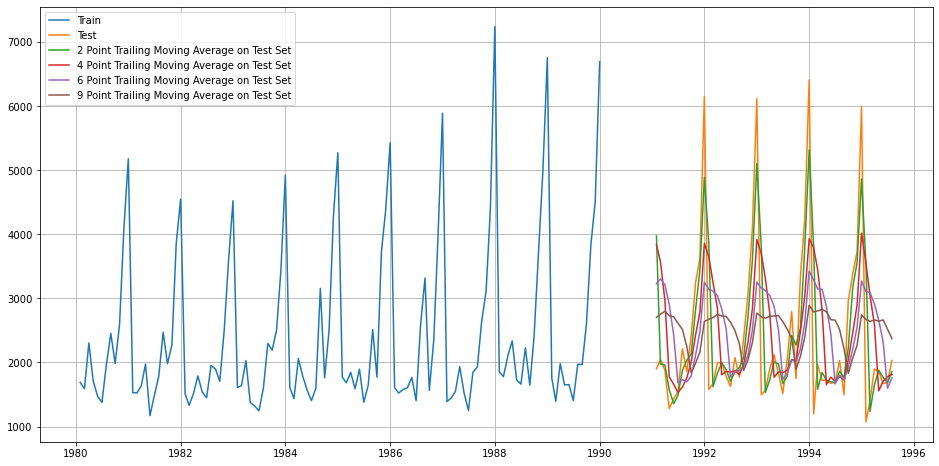

In [145]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_Sparkling_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_Sparkling_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_Sparkling_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_Sparkling_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_Sparkling_test['Trailing_6'], label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_Sparkling_test['Trailing_9'], label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [146]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2_Sparkling = metrics.mean_squared_error(Sparkling_test['Sparkling'],trailing_MovingAverage_Sparkling_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2_Sparkling))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4_Sparkling = metrics.mean_squared_error(Sparkling_test['Sparkling'],trailing_MovingAverage_Sparkling_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4_Sparkling))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6_Sparkling = metrics.mean_squared_error(Sparkling_test['Sparkling'],trailing_MovingAverage_Sparkling_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6_Sparkling))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9_Sparkling = metrics.mean_squared_error(Sparkling_test['Sparkling'],trailing_MovingAverage_Sparkling_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9_Sparkling))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [147]:
resultsDf_temp = pd.DataFrame({'Sparkling_Test RMSE': [rmse_model4_test_2_Sparkling,rmse_model4_test_4_Sparkling
                                          ,rmse_model4_test_6_Sparkling,rmse_model4_test_9_Sparkling]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_S = pd.concat([resultsDf_S, resultsDf_temp])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660
NaiveModel                                                  4480.132553
SimpleAverageModel                                          1275.078288
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315

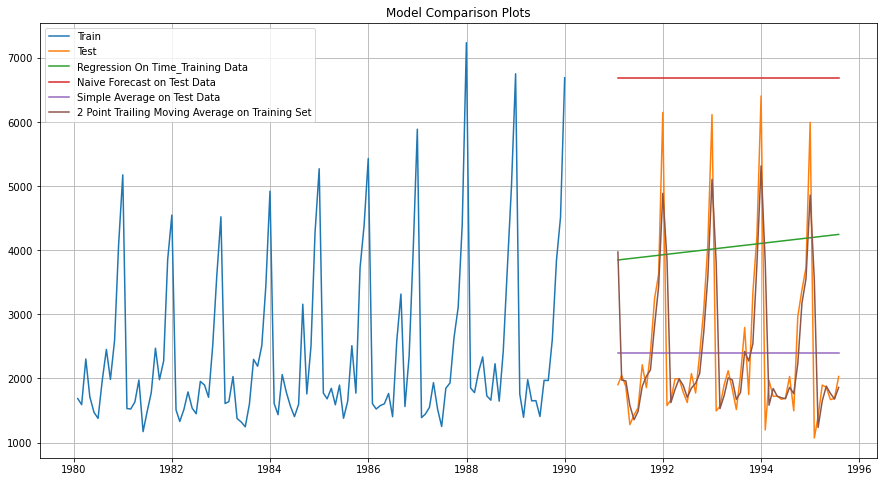

In [148]:
## Plotting on both Training and Test data

plt.plot(Sparkling_train['Sparkling'], label='Train')
plt.plot(Sparkling_test['Sparkling'], label='Test')

plt.plot(LinearRegression_test_Sparkling['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test_Sparkling['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_Sparkling['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_Sparkling_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [149]:
from statsmodels.tsa.stattools import adfuller

In [150]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

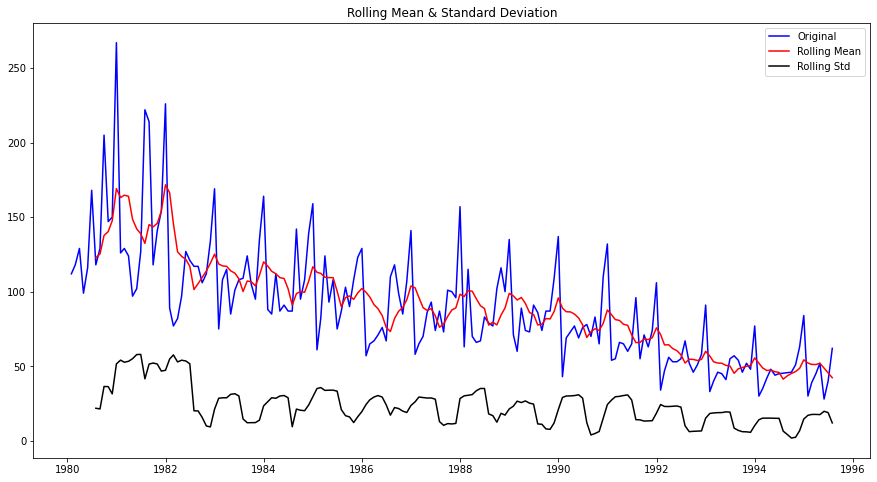

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [151]:
test_stationarity(Rose['Rose'])

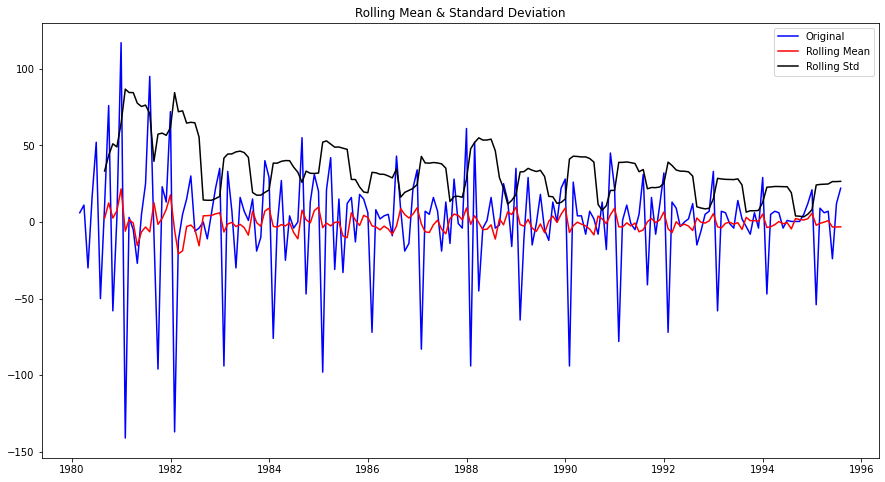

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [152]:
test_stationarity(Rose['Rose'].diff(1).dropna())

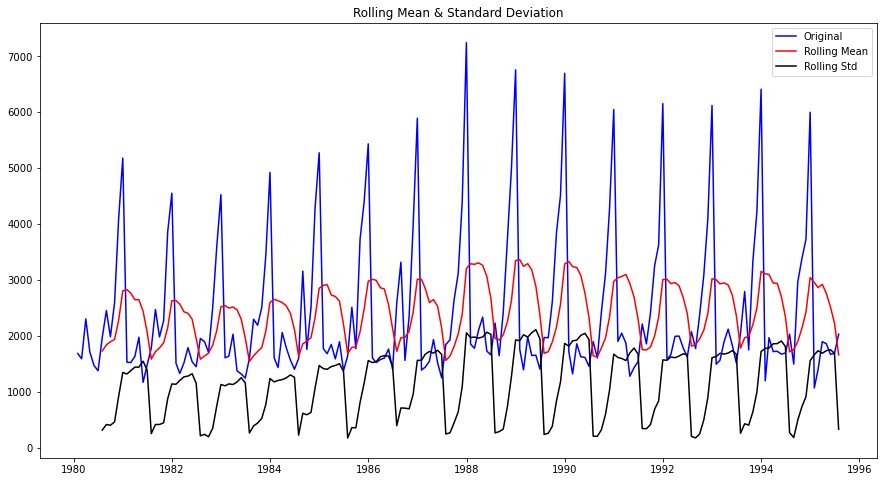

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [153]:
test_stationarity(Sparkling['Sparkling'])

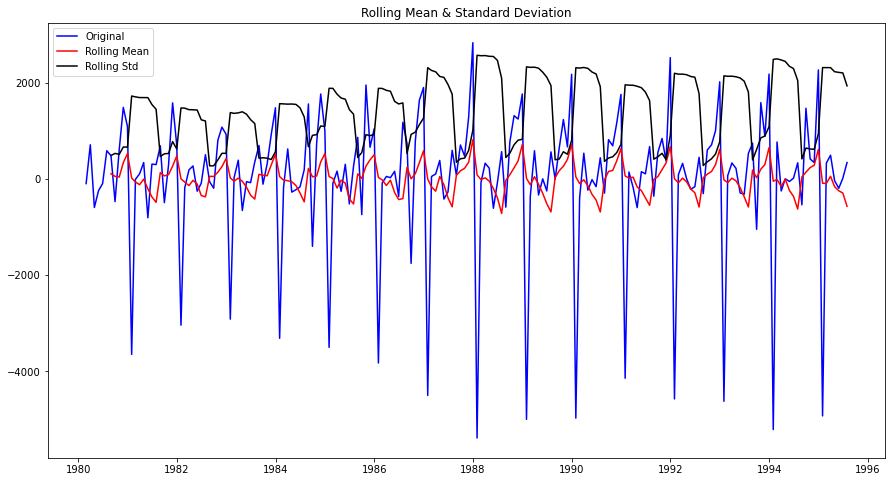

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [154]:
test_stationarity(Sparkling['Sparkling'].diff().dropna())

In [155]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

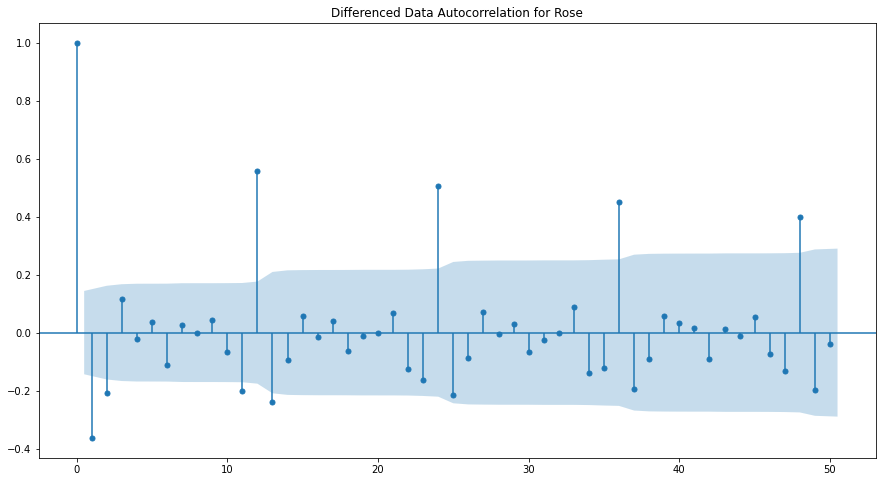

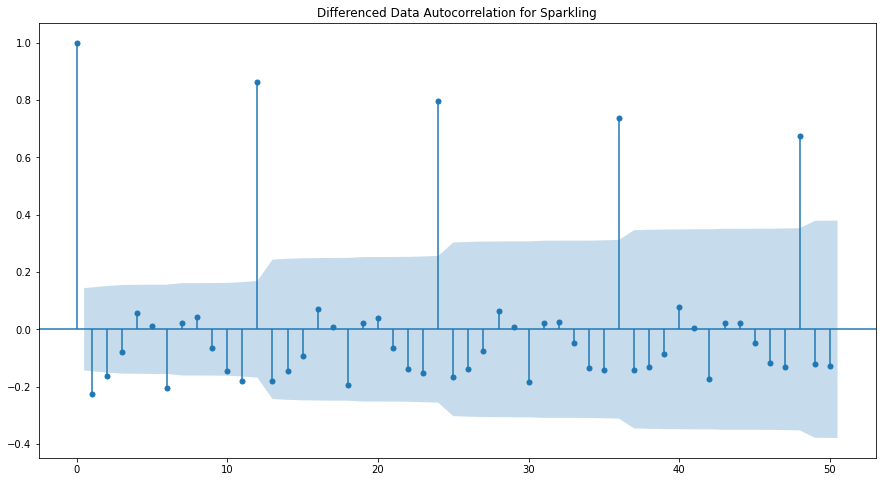

In [156]:
plot_acf(Rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation for Rose')
plot_acf(Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation for Sparkling')
plt.show()

D:\Programs\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


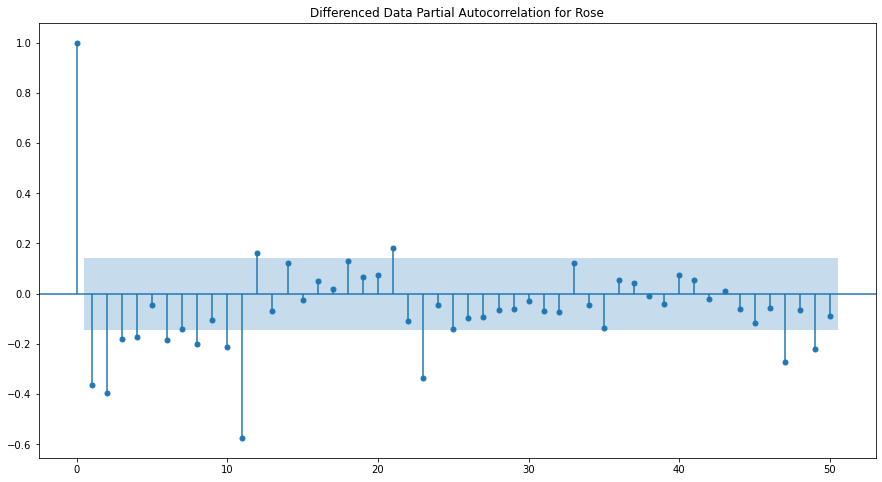

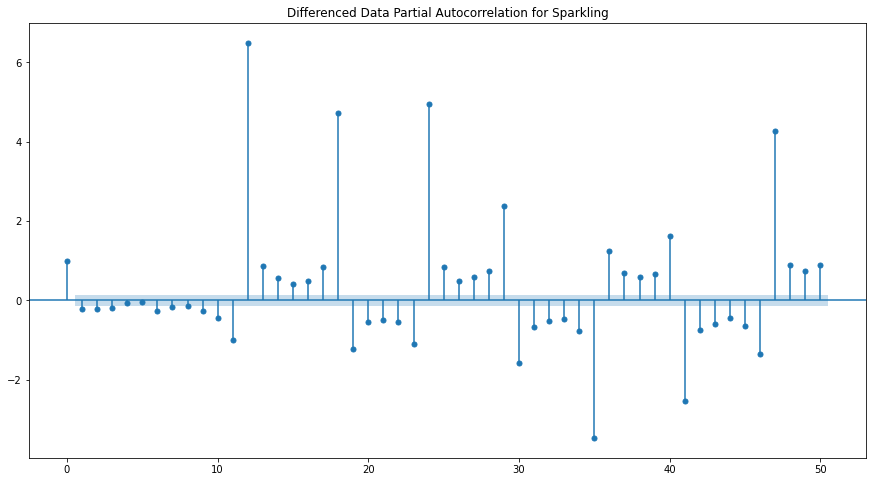

In [157]:
plot_pacf(Rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation for Rose')
plot_pacf(Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation for Sparkling')
plt.show()

In [158]:
print(Rose_train.shape)
print(Rose_test.shape)
print(Sparkling_train.shape)
print(Sparkling_test.shape)

(120, 1)
(55, 1)
(120, 1)
(55, 1)


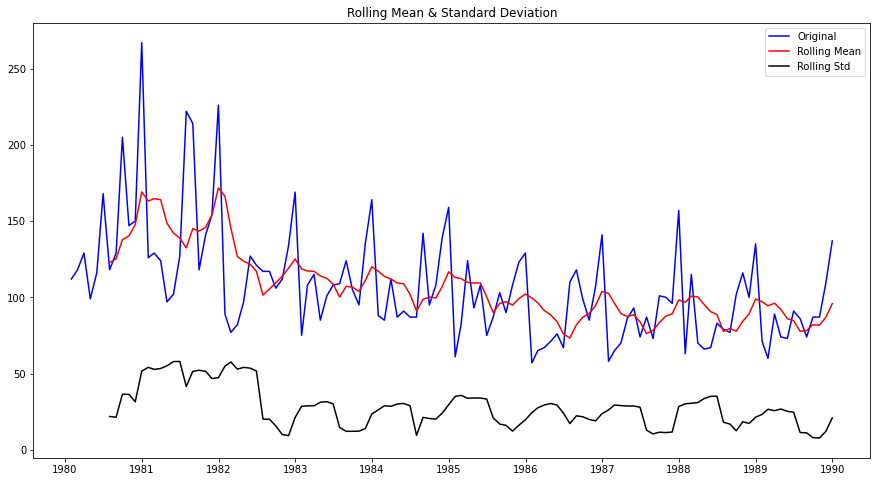

Results of Dickey-Fuller Test:
Test Statistic                  -2.192106
p-value                          0.209123
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64 



In [159]:
test_stationarity(Rose_train['Rose'])

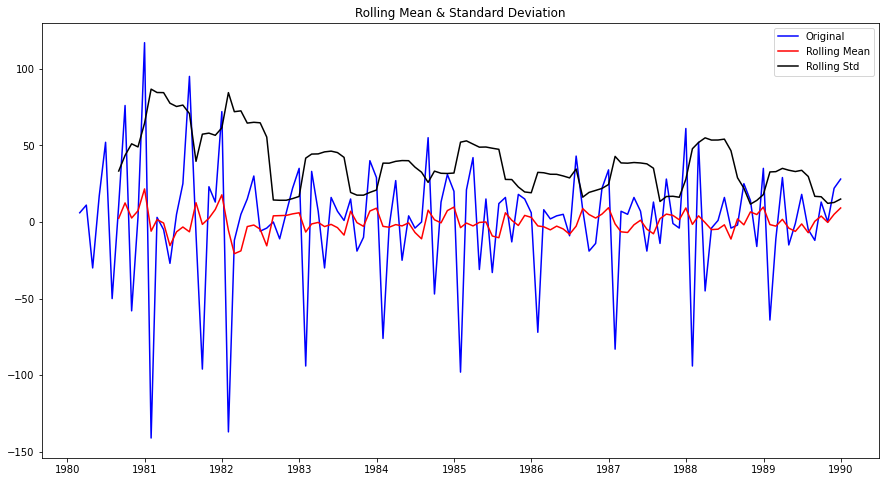

Results of Dickey-Fuller Test:
Test Statistic                -6.098139e+00
p-value                        9.984981e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64 



In [160]:
test_stationarity(Rose_train['Rose'].diff().dropna())

In [161]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = range(0, 4)
q = range(0, 4)
d = range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [162]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [163]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model_Rose = ARIMA(Rose_train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_Rose.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model_Rose.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1216.7630290970103
ARIMA(0, 1, 1) - AIC:1169.3846524334465
ARIMA(0, 1, 2) - AIC:1165.4807569244836


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 3) - AIC:1166.870475289319
ARIMA(1, 1, 0) - AIC:1202.91237291428


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 1) - AIC:1166.356974587955


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 2) - AIC:1166.237370184364


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

ARIMA(1, 1, 3) - AIC:1168.1721103708473
ARIMA(2, 1, 0) - AIC:1185.9044366937935
ARIMA(2, 1, 1) - AIC:1167.7823788338653


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 2) - AIC:1168.1485713992051


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 3) - AIC:1170.0129970966316
ARIMA(3, 1, 0) - AIC:1185.3141932298327


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(3, 1, 1) - AIC:1168.328952877048


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(3, 1, 2) - AIC:1169.7445071946754
ARIMA(3, 1, 3) - AIC:1165.0300895467294


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [164]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
15  (3, 1, 3)  1165.030090
2   (0, 1, 2)  1165.480757
6   (1, 1, 2)  1166.237370
5   (1, 1, 1)  1166.356975
3   (0, 1, 3)  1166.870475
9   (2, 1, 1)  1167.782379
10  (2, 1, 2)  1168.148571
7   (1, 1, 3)  1168.172110
13  (3, 1, 1)  1168.328953
1   (0, 1, 1)  1169.384652
14  (3, 1, 2)  1169.744507
11  (2, 1, 3)  1170.012997
12  (3, 1, 0)  1185.314193
8   (2, 1, 0)  1185.904437
4   (1, 1, 0)  1202.912373
0   (0, 1, 0)  1216.763029

In [165]:
auto_ARIMA = ARIMA(Rose_train['Rose'], order=(3,1,3),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  119
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -574.515
Method:                       css-mle   S.D. of innovations             29.535
Date:                Sat, 22 May 2021   AIC                           1165.030
Time:                        21:12:49   BIC                           1187.263
Sample:                    02-29-1980   HQIC                          1174.058
                         - 12-31-1989                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5102      0.100     -5.085      0.000      -0.707      -0.314
ar.L1.D.Rose    -1.5180      0.109    -13.983      0.000      -1.731      -1.305
ar.L2.D.Rose    -0.5599      0.164     -3.41

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [166]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(Rose_test))

In [167]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(Rose_test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

17.146781861558026


In [168]:
resultsDf_AR_R = pd.DataFrame({'Rose_Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,resultsDf_AR_R])

resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106
NaiveModel                                               84.625867
SimpleAverageModel                                       55.968452
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630
ARIMA(3,1,3)                                             17.146782

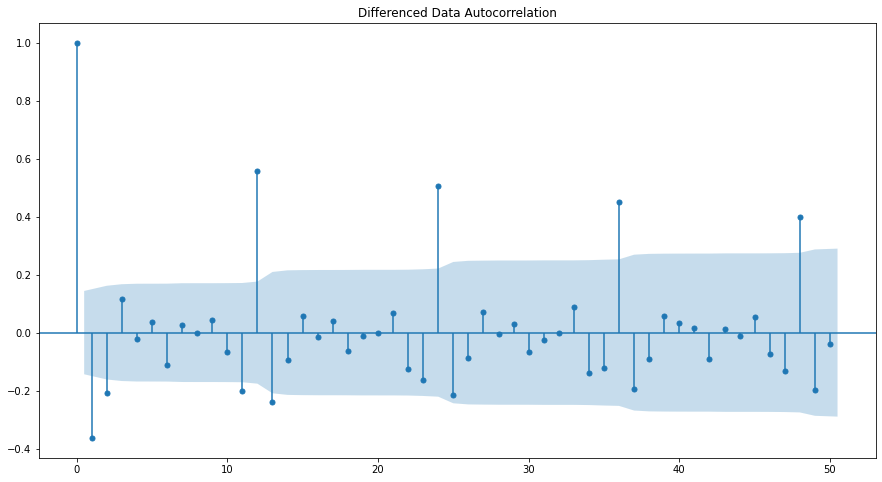

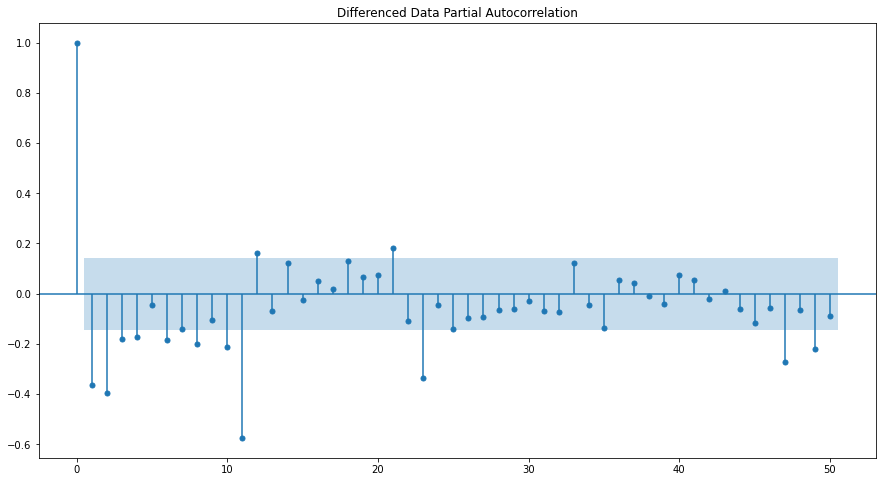

In [169]:
plot_acf(Rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [170]:
manual_ARIMA = ARIMA(Rose_train['Rose'].astype('float64'), order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  119
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -574.518
Method:                       css-mle   S.D. of innovations             29.323
Date:                Sat, 22 May 2021   AIC                           1165.036
Time:                        21:12:50   BIC                           1187.269
Sample:                    02-29-1980   HQIC                          1174.064
                         - 12-31-1989                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2015      0.767     -0.263      0.793      -1.705       1.302
ar.L1.D.Rose     1.0878      0.085     12.759      0.000       0.921       1.255
ar.L2.D.Rose    -0.3874      0.129     -2.99

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [171]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(Rose_test))

In [172]:
rmse = mean_squared_error(Rose_test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

45.276805522544905


In [173]:
temp_resultsDf = pd.DataFrame({'Rose_Test RMSE': [rmse]}
                           ,index=['ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106
NaiveModel                                               84.625867
SimpleAverageModel                                       55.968452
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630
ARIMA(3,1,3)                                             17.146782
ARIMA(4,1,2)                                             45.276806

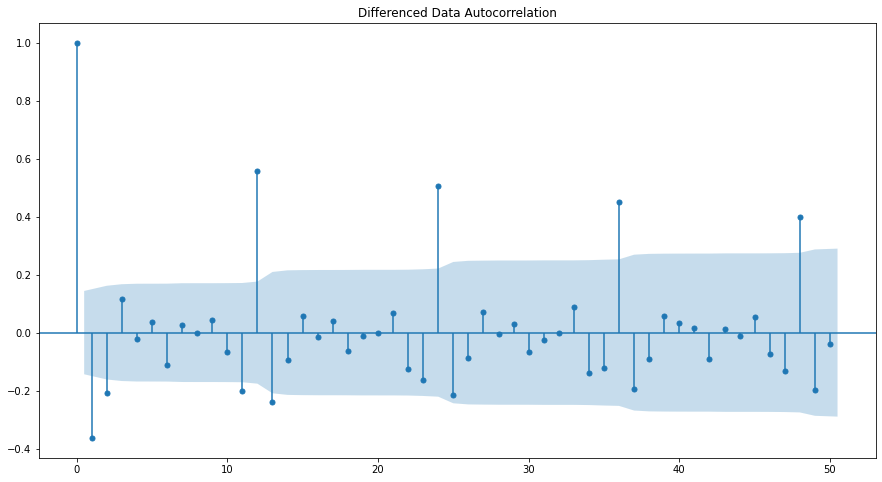

In [174]:
plot_acf(Rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [175]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [176]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [177]:
import statsmodels.api as sm

In [178]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1205.5480023704872
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1145.9700053790211
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1030.1633245895596
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:966.2285711803535
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1156.3644367650948
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1125.933445510761
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1031.5909428892915
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:945.0119837044283
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1027.3636374274238
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1026.9283292150901
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1008.2760768280648
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:951.2160315859406
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:962.8156814137888
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:953.7116681466093
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:950.4992036537442
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:943.1848194360547
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1151.2001025773325
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1089.0466636400288
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:9

SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:866.9418991842264
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:873.71426148839
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:875.07160239896
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:869.1832594736001
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:868.9417139851781
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1141.8746113065606
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1075.6135730807305
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:975.5820730838038
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:899.1856503103069
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1088.700829384953
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1042.4436749903991
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:956.5340010514769
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:892.4985267397184
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:970.251755505896
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:967.064417346039
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:943.2355552134921
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:861.7018168073207
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:875.2677601241885
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:876.4055809642

In [179]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
59   (0, 1, 3)  (2, 0, 3, 6)  853.040279
187  (2, 1, 3)  (2, 0, 3, 6)  854.095687
123  (1, 1, 3)  (2, 0, 3, 6)  854.482713
191  (2, 1, 3)  (3, 0, 3, 6)  854.893393
63   (0, 1, 3)  (3, 0, 3, 6)  854.971614

In [180]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(0, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  120
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -417.520
Date:                           Sat, 22 May 2021   AIC                            853.040
Time:                                   21:16:55   BIC                            876.213
Sample:                                        0   HQIC                           862.410
                                           - 120                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7460     31.744     -0.024      0.981     -62.963      61.470
ma.L2         -0.2567      8.074     -0.032

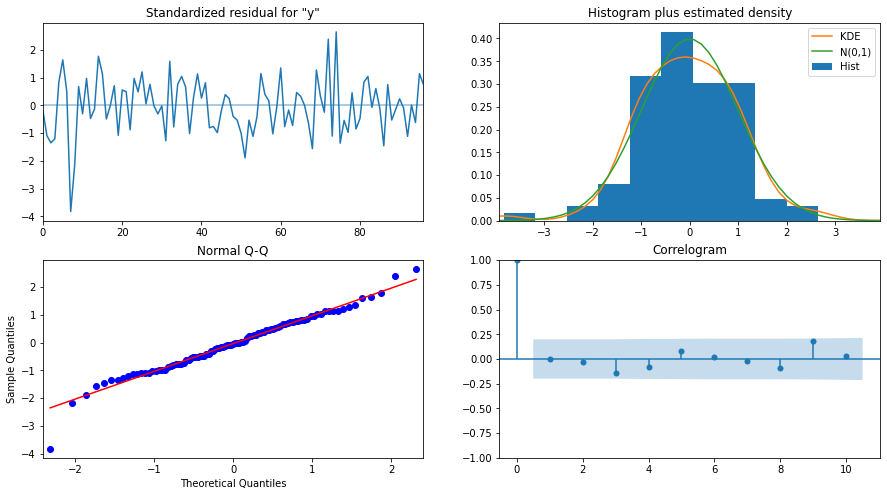

In [181]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [182]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(Rose_test))

In [183]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  75.909054  17.289405      42.022443     109.795665
1  73.110981  17.881095      38.064679     108.157283
2  88.579620  17.879343      53.536751     123.622488
3  83.474080  17.872145      48.445320     118.502841
4  79.524213  17.872145      44.495452     114.552975

In [184]:
rmse = mean_squared_error(Rose_test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

35.6429015359356


In [185]:
temp_resultsDf = pd.DataFrame({'Rose_Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106
NaiveModel                                               84.625867
SimpleAverageModel                                       55.968452
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630
ARIMA(3,1,3)                                             17.146782
ARIMA(4,1,2)                                             45.276806
SARIMA(0,1,3)(2,0,3,6)                                   35.642902

In [186]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [187]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [188]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1205.5480023704872
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1030.1031252093821
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:866.6841650054021
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1029.2277244726533
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1007.8700600345835
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:862.7534181795231
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:855.6430770612632
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:857.633845731869
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:849.732240793127
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1151.2001025773325
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:992.4259606297345
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:820.5139476973883
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:992.7672450122974
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:954.0793303915613
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:816.8669009089956
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:815.6265768007706
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:816.6826595469921
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:802.5838067928784
SARIMA(0, 1, 2)x(0, 0, 0,

In [189]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  790.022736
53  (1, 1, 2)  (2, 0, 2, 12)  791.843116
80  (2, 1, 2)  (2, 0, 2, 12)  792.851448
69  (2, 1, 1)  (2, 0, 0, 12)  798.435500
78  (2, 1, 2)  (2, 0, 0, 12)  799.146308

In [190]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -388.011
Date:                            Sat, 22 May 2021   AIC                            790.023
Time:                                    21:17:42   BIC                            807.675
Sample:                                         0   HQIC                           797.147
                                            - 120                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8449    379.589     -0.002      0.998    -744.825     743.135
ma.L2         -0.1551     58.836   

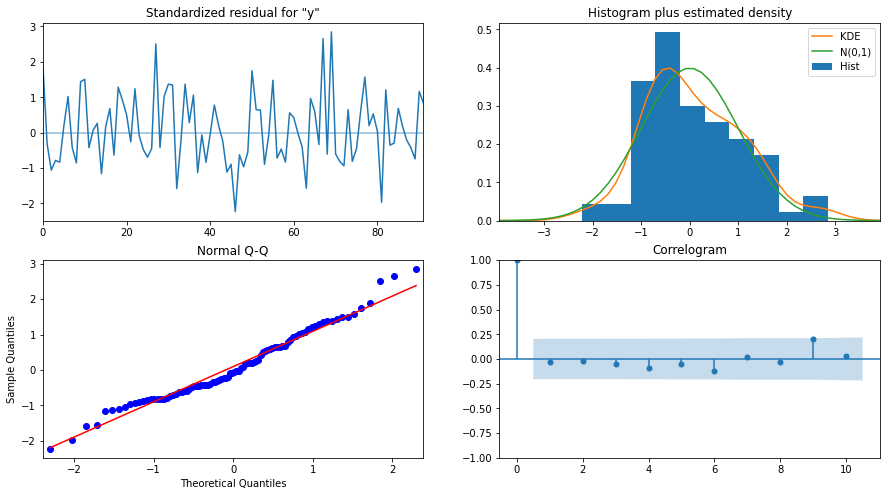

In [191]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [192]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(Rose_test))

In [193]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  75.571599  16.180288      43.858817     107.284380
1  81.600437  16.399193      49.458608     113.742265
2  82.239208  16.399193      50.097380     114.381037
3  74.804194  16.399193      42.662366     106.946023
4  74.485782  16.399193      42.343953     106.627610

In [194]:
rmse = mean_squared_error(Rose_test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

32.489356620866


In [195]:
temp_resultsDf = pd.DataFrame({'Rose_Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106
NaiveModel                                               84.625867
SimpleAverageModel                                       55.968452
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630
ARIMA(3,1,3)                                             17.146782
ARIMA(4,1,2)                                             45.276806
SARIMA(0,1,3)(2,0,3,6)                                   35.642902
SARIMA(0,1,2)(2,0,2,12)                                  32.489357

In [196]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(4, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  120
Model:             SARIMAX(4, 1, 2)x(4, 0, 2, 6)   Log Likelihood                -380.839
Date:                           Sat, 22 May 2021   AIC                            787.678
Time:                                   21:17:48   BIC                            820.319
Sample:                                        0   HQIC                           800.847
                                           - 120                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2623      2.041     -0.128      0.898      -4.264       3.739
ar.L2         -0.0111      0.290     -0.038

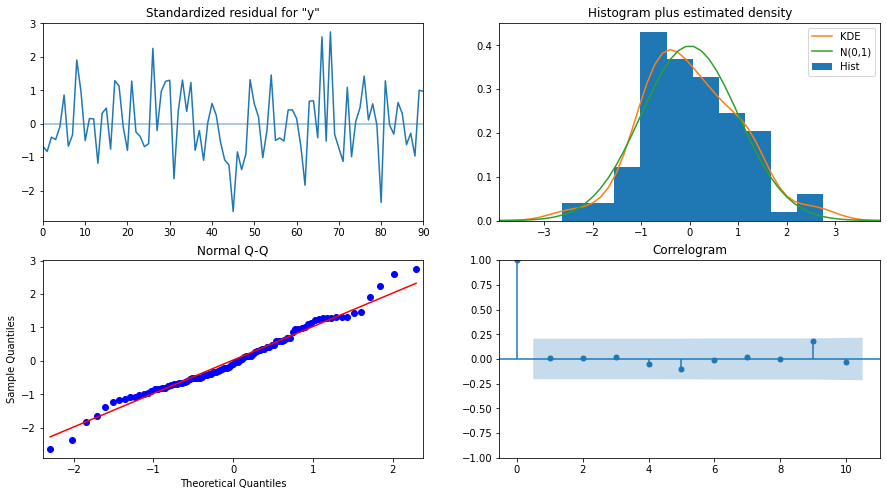

In [197]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [198]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(Rose_test))

In [199]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  75.664972  15.530001      45.226729     106.103214
1  77.244844  15.643425      46.584294     107.905395
2  83.769224  15.648602      53.098527     114.439921
3  77.882487  15.667226      47.175288     108.589686
4  73.149495  15.677596      42.421970     103.877019

In [200]:
rmse = mean_squared_error(Rose_test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

33.282191045411146


In [201]:
temp_resultsDf = pd.DataFrame({'Rose_Test RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(4,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Rose_Test RMSE
Alpha=0.99,SES                                           42.346482
Alpha=1,Beta=0.0189:DES                                  16.742204
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                       16.651904
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES       31.948268
RegressionOnTime                                         63.366106
NaiveModel                                               84.625867
SimpleAverageModel                                       55.968452
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630
ARIMA(3,1,3)                                             17.146782
ARIMA(4,1,2)                                             45.276806
SARIMA(0,1,3)(2,0,3,6)                                   35.642902
SARIMA(0,1,2)(2,0,2,12)                                  32.489357
SARIMA(4,1,2)(4,0,2,6)                                   33.282191

In [202]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

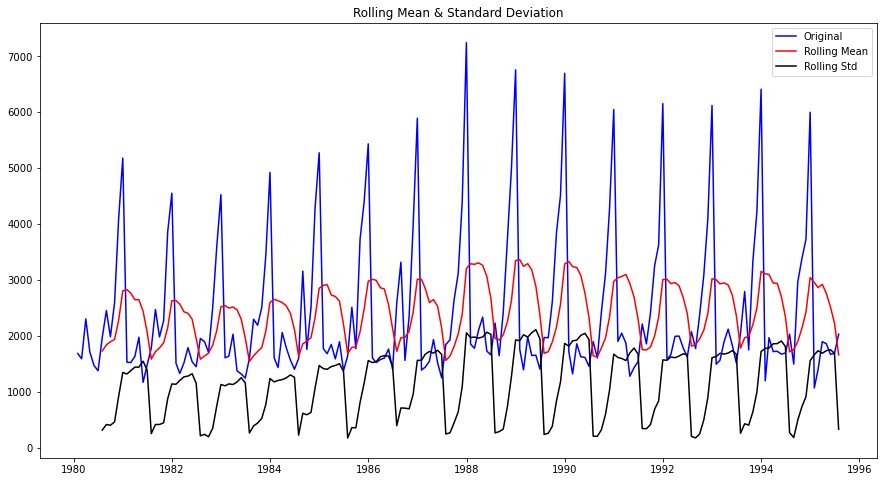

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [203]:
test_stationarity(Sparkling['Sparkling'])

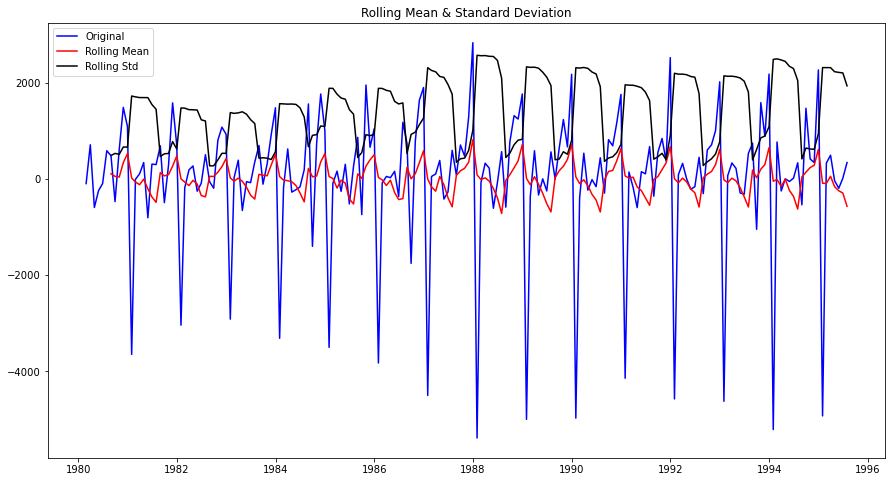

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [204]:
test_stationarity(Sparkling['Sparkling'].diff().dropna())

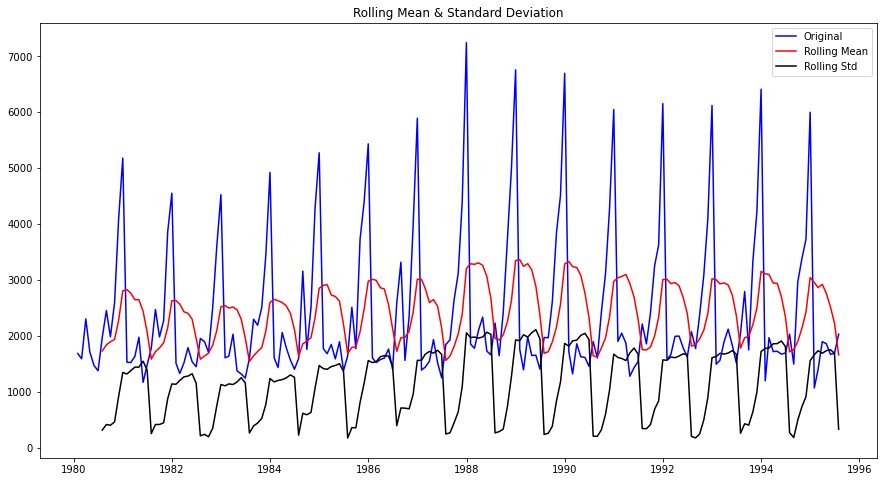

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [205]:
test_stationarity(Sparkling['Sparkling'])

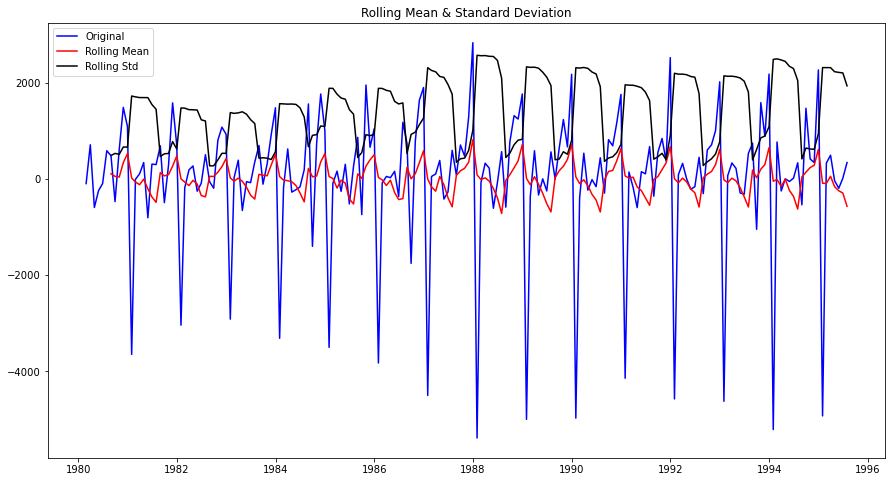

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [206]:
test_stationarity(Sparkling['Sparkling'].diff().dropna())

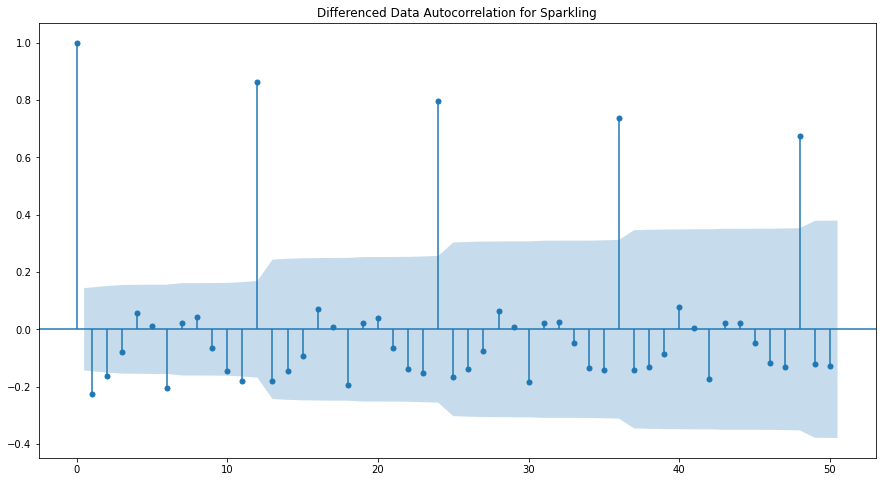

In [207]:
plot_acf(Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation for Sparkling')
plt.show()

D:\Programs\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


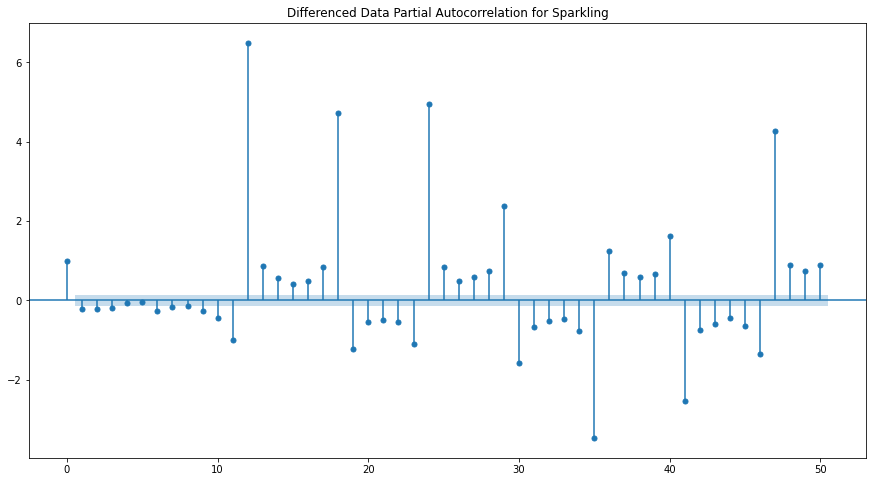

In [208]:
plot_pacf(Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation for Sparkling')
plt.show()

In [209]:
print(Sparkling_train.shape)
print(Sparkling_test.shape)

(120, 1)
(55, 1)


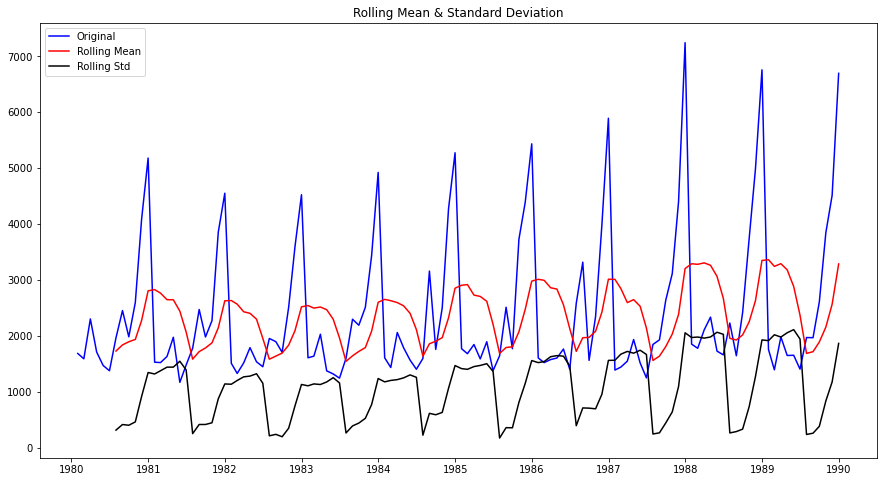

Results of Dickey-Fuller Test:
Test Statistic                  -0.812552
p-value                          0.815407
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [210]:
test_stationarity(Sparkling_train['Sparkling'])

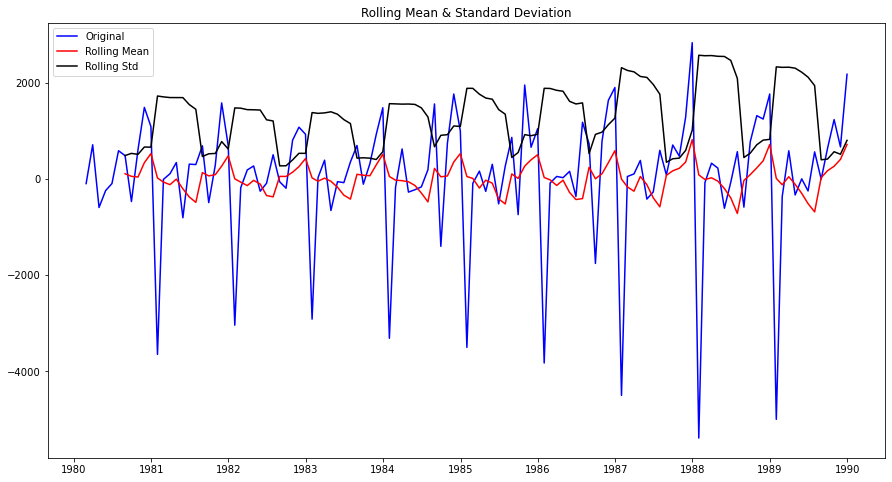

Results of Dickey-Fuller Test:
Test Statistic                -7.780892e+00
p-value                        8.423376e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64 



In [211]:
test_stationarity(Sparkling_train['Sparkling'].diff().dropna())

In [212]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = range(0, 3)
q = range(0, 3)
d = range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [213]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [214]:
for param in pdq:
    ARIMA_model_Sparkling = ARIMA(Sparkling_train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_Sparkling.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model_Sparkling.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2057.511941027279
ARIMA(0, 1, 1) - AIC:2053.689072898852


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 2) - AIC:2026.6816643470847
ARIMA(1, 1, 0) - AIC:2056.953790403002
ARIMA(1, 1, 1) - AIC:2028.5895472533416


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

ARIMA(1, 1, 2) - AIC:2027.4229410559365
ARIMA(2, 1, 0) - AIC:2050.6015068103334


D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:2026.3946843064336
ARIMA(2, 1, 2) - AIC:2009.8752310933542


D:\Programs\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  w

In [215]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2009.875231
7  (2, 1, 1)  2026.394684
2  (0, 1, 2)  2026.681664
5  (1, 1, 2)  2027.422941
4  (1, 1, 1)  2028.589547
6  (2, 1, 0)  2050.601507
1  (0, 1, 1)  2053.689073
3  (1, 1, 0)  2056.953790
0  (0, 1, 0)  2057.511941

In [216]:
auto_ARIMA = ARIMA(Sparkling_train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  119
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -998.938
Method:                       css-mle   S.D. of innovations           1012.031
Date:                Sat, 22 May 2021   AIC                           2009.875
Time:                        21:17:54   BIC                           2026.550
Sample:                    02-29-1980   HQIC                          2016.646
                         - 12-31-1989                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.0565      0.578     10.484      0.000       4.924       7.189
ar.L1.D.Sparkling     1.2755      0.081     15.809      0.000       1.117       1.434
ar.L2.D.Sparkling    -0.

D:\Programs\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  w

In [217]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(Sparkling_test))

In [218]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(Sparkling_test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1371.2965930290275


In [219]:
resultsDf_temp = pd.DataFrame({'Sparkling_Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_S = pd.concat([resultsDf_S, resultsDf_temp])
resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660
NaiveModel                                                  4480.132553
SimpleAverageModel                                          1275.078288
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
ARIMA(2,1,2)                                                1371.296593

D:\Programs\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


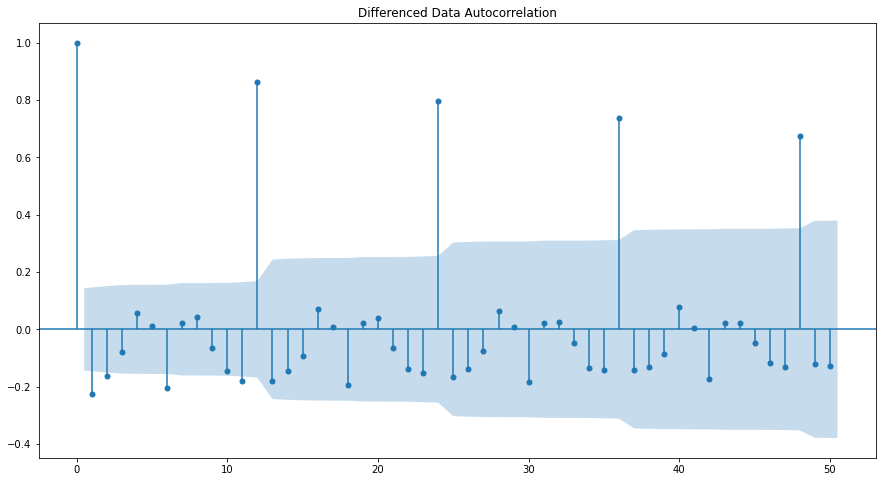

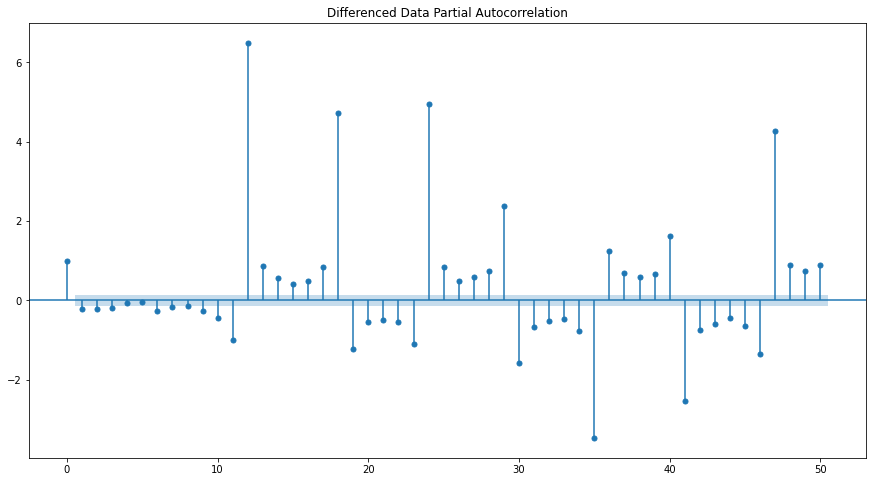

In [220]:
plot_acf(Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [221]:
manual_ARIMA = ARIMA(Sparkling_train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  119
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1004.478
Method:                       css-mle   S.D. of innovations           1089.521
Date:                Sat, 22 May 2021   AIC                           2022.956
Time:                        21:17:55   BIC                           2042.410
Sample:                    02-29-1980   HQIC                          2030.856
                         - 12-31-1989                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6789      4.181      1.837      0.066      -0.516      15.874
ar.L1.D.Sparkling    -0.4265   1.12e-05  -3.81e+04      0.000      -0.427      -0.427
ar.L2.D.Sparkling     0.

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [222]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(Sparkling_test))

In [223]:
rmse = mean_squared_error(Sparkling_test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1431.9894879176404


In [224]:
temp_resultsDf = pd.DataFrame({'Sparkling_Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf_S = pd.concat([resultsDf_S,temp_resultsDf])

resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660
NaiveModel                                                  4480.132553
SimpleAverageModel                                          1275.078288
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
ARIMA(2,1,2)                                                1371.296593
ARIMA(3,1,2)                                                1431.989488

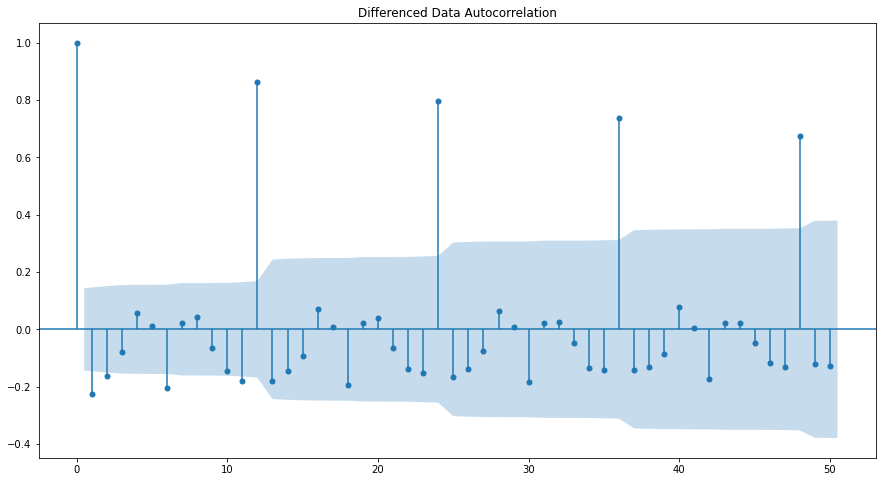

In [225]:
plot_acf(Sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [226]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [227]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [228]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2039.365905379547
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1940.5731887070256
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1753.2570629185082
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1952.6616336920017
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1876.096768506582
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1731.8365462690624
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1663.217479774882
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1665.153787883823
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1635.7037283043612
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2019.073039146129
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1919.6691456821366
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1722.4894267542002
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1934.6946342728588
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1809.900577742559
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1666.709561484125
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1625.2422724893354
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1626.4793270746673
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1566.0026471205165
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:

In [229]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1551.456067
26  (0, 1, 2)  (2, 0, 2, 6)  1552.593762
80  (2, 1, 2)  (2, 0, 2, 6)  1552.615112
17  (0, 1, 1)  (2, 0, 2, 6)  1566.002647
44  (1, 1, 1)  (2, 0, 2, 6)  1567.853595

In [230]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  120
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -767.728
Date:                           Sat, 22 May 2021   AIC                           1551.456
Time:                                   21:18:29   BIC                           1572.611
Sample:                                        0   HQIC                          1560.027
                                           - 120                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6643      0.255     -2.605      0.009      -1.164      -0.165
ma.L1         -0.1396      0.211     -0.662

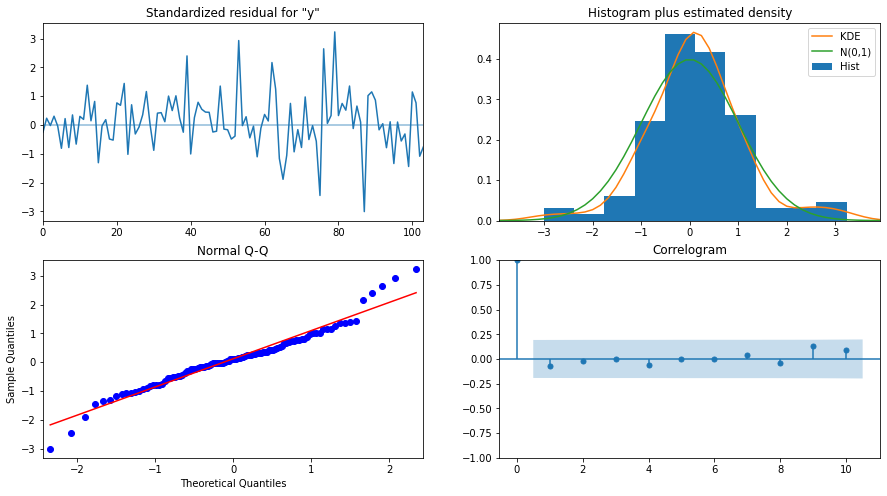

In [231]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [232]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(Sparkling_test))

In [233]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1716.118115  375.565107     980.024031    2452.212199
1  1512.185315  382.705199     762.096907    2262.273723
2  1991.673218  383.043816    1240.921134    2742.425303
3  1968.790786  385.463095    1213.297002    2724.284570
4  1660.562027  385.480084     905.034945    2416.089109

In [234]:
rmse = mean_squared_error(Sparkling_test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

681.4485727940644


In [235]:
temp_resultsDf = pd.DataFrame({'Sparkling_Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf_S = pd.concat([resultsDf_S,temp_resultsDf])

resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660
NaiveModel                                                  4480.132553
SimpleAverageModel                                          1275.078288
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
ARIMA(2,1,2)                                                1371.296593
ARIMA(3,1,2)                                                1431.989488
SARIMA(1,1,2)(2,0,2,6)                                       681.448573

In [236]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [237]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [238]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2039.365905379547
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1754.7414861914067
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1528.2148897873963
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1661.3247652647444
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1634.6530874082775
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1454.4755114817422
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1473.329137509557
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1472.5742723491876
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1454.8216032258342
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2019.073039146129
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1736.3102815195525
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1501.30877222246
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1623.8427305943987
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1562.3341264269598
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1391.7935156599565
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1430.7838756363763
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1420.8764458144885
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1392.1516409040894
SARIMA(0, 1, 2)

In [239]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1376.686265
53  (1, 1, 2)  (2, 0, 2, 12)  1376.773611
77  (2, 1, 2)  (1, 0, 2, 12)  1378.151897
80  (2, 1, 2)  (2, 0, 2, 12)  1378.184600
26  (0, 1, 2)  (2, 0, 2, 12)  1379.162020

In [240]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -681.343
Date:                            Sat, 22 May 2021   AIC                           1376.686
Time:                                    21:20:00   BIC                           1394.339
Sample:                                         0   HQIC                          1383.811
                                            - 120                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6437      0.194     -3.320      0.001      -1.024      -0.264
ma.L1         -0.1704      0.530   

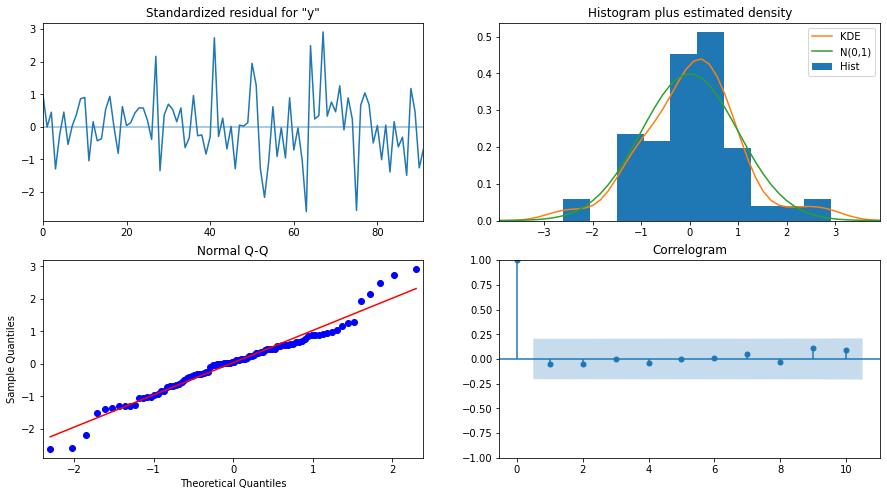

In [241]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [242]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(Sparkling_test))

In [243]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1733.875142  375.807484     997.306007    2470.444276
1  1564.214634  383.740513     812.097050    2316.332219
2  2003.499929  385.247522    1248.428661    2758.571198
3  1880.973971  386.661632    1123.131098    2638.816843
4  1694.240035  386.721432     936.279955    2452.200114

In [244]:
rmse = mean_squared_error(Sparkling_test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

753.2549807526992


In [245]:
temp_resultsDf = pd.DataFrame({'Sparkling_Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf_S = pd.concat([resultsDf_S,temp_resultsDf])

resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660
NaiveModel                                                  4480.132553
SimpleAverageModel                                          1275.078288
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
ARIMA(2,1,2)                                                1371.296593
ARIMA(3,1,2)                                                1431.989488
SARIMA(1,1,2)(2,0,2,6)                                       681.448573
SARIMA(1,1,2)(1,0,2,12)                                      753.254981

In [246]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  120
Model:             SARIMAX(3, 1, 2)x(3, 0, 2, 6)   Log Likelihood                -727.116
Date:                           Sat, 22 May 2021   AIC                           1476.232
Time:                                   21:20:10   BIC                           1504.667
Sample:                                        0   HQIC                          1487.733
                                           - 120                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8295      0.263      3.157      0.002       0.314       1.344
ar.L2         -0.1783      0.181     -0.985

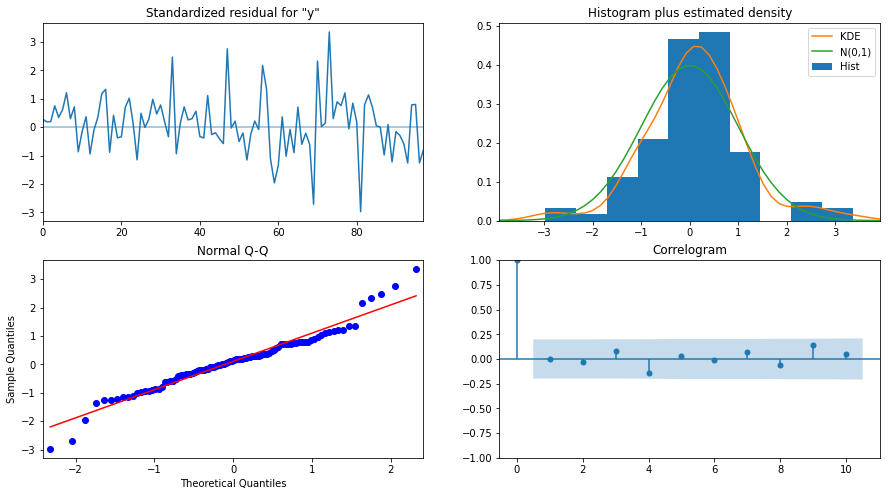

In [247]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [248]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(Sparkling_test))

In [249]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1812.473937  379.469838    1068.726722    2556.221152
1  1690.872468  381.344918     943.450163    2438.294773
2  1967.092809  382.772382    1216.872727    2717.312891
3  1915.709237  382.852769    1165.331599    2666.086876
4  1742.060313  383.337361     990.732892    2493.387734

In [250]:
rmse = mean_squared_error(Sparkling_test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

741.8046853859546


In [251]:
temp_resultsDf = pd.DataFrame({'Sparkling_Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(3,0,2,6)'])


resultsDf_S = pd.concat([resultsDf_S,temp_resultsDf])

resultsDf_S

Sparkling_Test RMSE
Alpha=0.99,SES                                              1341.113564
Alpha=1,Beta=0.0189:DES                                     5812.989690
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                           459.420049
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES           441.382097
RegressionOnTime                                            2086.288660
NaiveModel                                                  4480.132553
SimpleAverageModel                                          1275.078288
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
ARIMA(2,1,2)                                                1371.296593
ARIMA(3,1,2)                                                1431.989488
SARIMA(1,1,2)(2,0,2,6)                                       681.448573
SARIMA(1,1,2)(1,0,2,12)                                      753.254981
SARIMA(3,1,2)(3,0,2,6)                                       741.804685

In [252]:
fullmodel1 = ExponentialSmoothing(Sparkling,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.07588861117792611,
                                                                 smoothing_slope=0.06503510925352711,
                                                                 smoothing_seasonal=0.30815324446359105)

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-252-95b14931f1e3>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fullmodel1 = ExponentialSmoothing(Sparkling,


In [253]:
RMSE_fullmodel1 = metrics.mean_squared_error(Sparkling['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 347.4420416193077


In [254]:
prediction_1 = fullmodel1.forecast(steps=12)

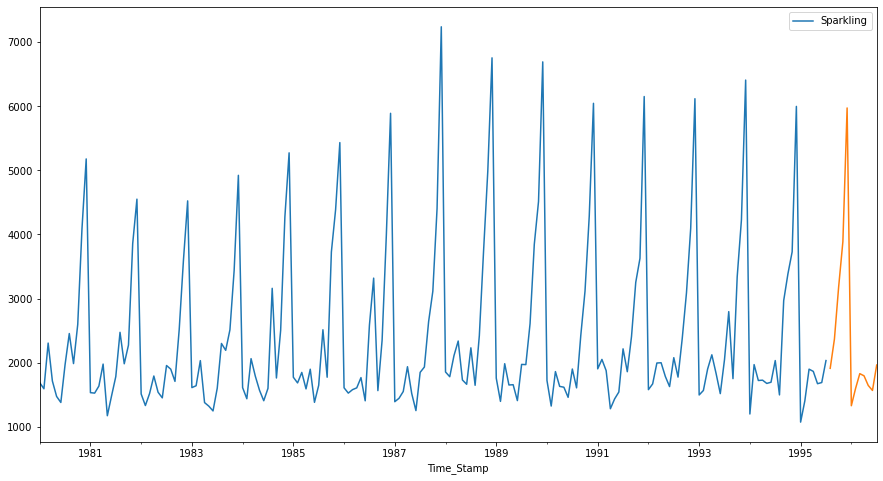

In [255]:
Sparkling.plot()
prediction_1.plot();

In [256]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1227.864262  1909.954173  2592.044083
1995-09-30  1684.693284  2366.783195  3048.873105
1995-10-31  2500.079485  3182.169395  3864.259306
1995-11-30  3205.604746  3887.694656  4569.784567
1995-12-31  5292.588951  5974.678861  6656.768771

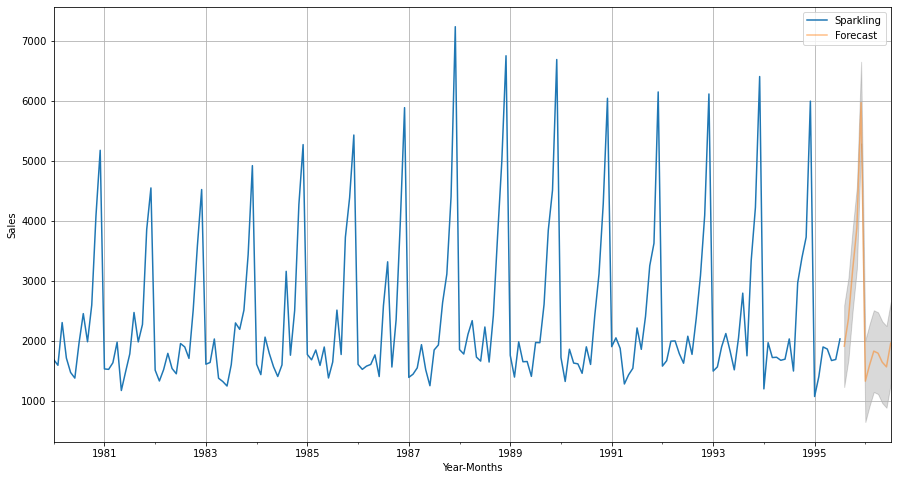

In [262]:
# plot the forecast along with the confidence band

axis = Sparkling.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [331]:
fullmodel1 = ExponentialSmoothing(Rose,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.08904861575646025,
                                                                 smoothing_slope=2.489897981494328e-06,
                                                                 smoothing_seasonal=0.0003979698957395684)

D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-331-019fe846395d>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fullmodel1 = ExponentialSmoothing(Rose,


In [332]:
RMSE_fullmodel1 = metrics.mean_squared_error(Rose['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 16.11228164402106


In [333]:
prediction_1 = fullmodel1.forecast(steps=12)

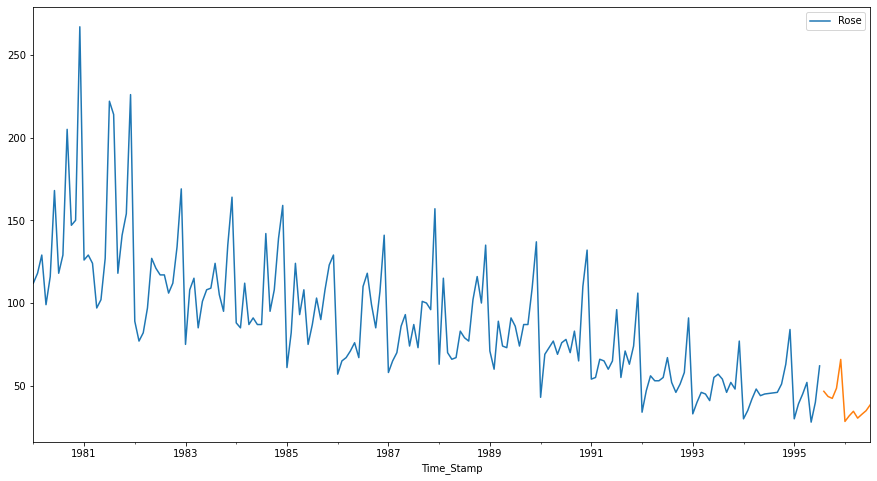

In [334]:
Rose.plot()
prediction_1.plot();

In [335]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction   upper_ci
1995-08-31  14.967535   46.632385  78.297236
1995-09-30  11.836135   43.500985  75.165836
1995-10-31  10.690843   42.355693  74.020544
1995-11-30  16.835469   48.500319  80.165170
1995-12-31  34.233734   65.898585  97.563435

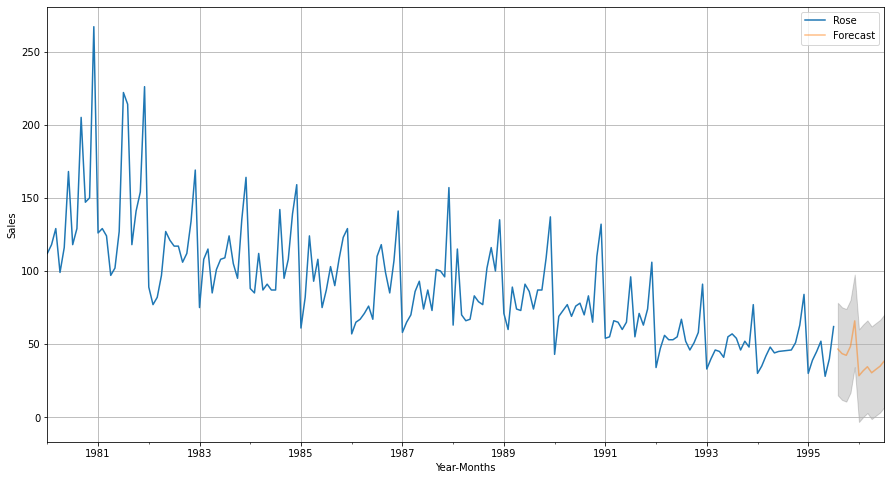

In [336]:
# plot the forecast along with the confidence band

axis = Rose.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()